# Fabular

In [1]:
import pandas as pd
import glob
import os

## Data Load

In [2]:
#mydateparser = lambda x: pd.datetime.strptime(x, "%d %m %Y %H:%M:%S")
sampledata = pd.read_csv('fabular_playerlog_sample.csv', parse_dates=[0])

globbed_files = glob.glob('data/*.csv')

all_data = []

for csv in globbed_files:
    frame = pd.read_csv(csv, parse_dates=[0], names=sampledata.columns)
    frame['player_id'] = os.path.basename(csv)
    all_data.append(frame)

In [3]:
player_logs = pd.concat(all_data, axis=0) 

In [4]:
player_logs = player_logs.reset_index(drop=True)
player_logs

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id
0,2021-11-13 08:11:30,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,0001.csv
1,2021-11-13 08:11:40,NaN,MainMenu,gameclose,NaN,NaN,NaN,NaN,0001.csv
2,2021-11-14 04:27:30,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,0001.csv
3,2021-11-14 04:27:57,R_Tutorial,NaN,event,Start,TUT_START,NaN,NaN,0001.csv
4,2021-11-14 04:28:10,R_Tutorial,NaN,event,Start,TUT_START.TUT_START_1,NaN,NaN,0001.csv
...,...,...,...,...,...,...,...,...,...
755064,2020-10-05 05:45:22,R_Kingdom,MainMenu,gameclose,NaN,NaN,NaN,NaN,2228.csv
755065,2020-10-05 07:24:03,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,2229.csv
755066,2020-10-05 07:24:53,NaN,MainMenu,gameclose,NaN,NaN,NaN,NaN,2229.csv
755067,2020-10-05 12:16:50,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,2229.csv


## Separate events

In [5]:
player_logs['prior_time'] = player_logs[['event_datetime']].shift(1)
player_logs['prior_player'] = player_logs[['player_id']].shift(1)

In [6]:
# cumulative count that resets for each player, and only increases with each change in timestamp
cumsum = 0
for index, row in player_logs.iterrows():
        if (row['prior_player'] is None ) | (row['player_id'] != row['prior_player']):
            cumsum = 0
        if (row['prior_time'] is None) | (row['event_datetime'] != row['prior_time']):
            cumsum = cumsum + 1
        player_logs.loc[index, 'event_id'] = cumsum
        if index % 10000 == 0:
            print(str(index) + " rows have cumulative count applied")
            
# this takes ages, would be nice to look for alternative way of doing this.

0 rows have cumulative count applied
10000 rows have cumulative count applied
20000 rows have cumulative count applied
30000 rows have cumulative count applied
40000 rows have cumulative count applied
50000 rows have cumulative count applied
60000 rows have cumulative count applied
70000 rows have cumulative count applied
80000 rows have cumulative count applied
90000 rows have cumulative count applied
100000 rows have cumulative count applied
110000 rows have cumulative count applied
120000 rows have cumulative count applied
130000 rows have cumulative count applied
140000 rows have cumulative count applied
150000 rows have cumulative count applied
160000 rows have cumulative count applied
170000 rows have cumulative count applied
180000 rows have cumulative count applied
190000 rows have cumulative count applied
200000 rows have cumulative count applied
210000 rows have cumulative count applied
220000 rows have cumulative count applied
230000 rows have cumulative count applied
240000

In [7]:
# player_logs[(player_logs['player_id'] == '0001.csv') | (player_logs['player_id'] == '0002.csv')].to_csv('check_me.csv') 
# looks good
# lets make a save as applying cumulative count took a while / poorly optimised >.<
player_logs.to_csv('player_logs_with_event_id.csv', index=False)

## Exploring Sample Data

In [8]:
sampledata.head(5)

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3
0,2020-06-17 02:00:37,NaN,NaN,gamestart,NaN,NaN,NaN,NaN
1,2020-06-17 02:01:56,demorealm,NaN,event,Start,TUTORIAL,NaN,NaN
2,2020-06-17 02:02:10,demorealm,NaN,event,Start,TUTORIAL.TUTORIAL_2,NaN,NaN
3,2020-06-17 02:02:49,demorealm,NaN,event,Start,TUTORIAL.TUTORIAL_2.TUTORIAL_2_1,NaN,NaN
4,2020-06-17 02:03:35,demorealm,NaN,event,Start,TUTORIAL.TUTORIAL_2,NaN,NaN


In [9]:
sampledata.dtypes

event_datetime    datetime64[ns]
realm                     object
battle                    object
event_type                object
event_sub_type            object
event_value               object
event_value2              object
event_value3             float64
dtype: object

In [10]:
sampledata.isna().sum()

event_datetime       0
realm                7
battle            2748
event_type           0
event_sub_type      12
event_value        604
event_value2      3365
event_value3      4270
dtype: int64

In [11]:
sampledata.nunique()

event_datetime    2042
realm                1
battle              16
event_type          11
event_sub_type      24
event_value        467
event_value2        55
event_value3        14
dtype: int64

In [12]:
sampledata.event_type.value_counts()

battlestats    1314
event          1222
lootitems       905
battle          371
loot            244
shop_trans      200
shop            134
realm            68
gamestart         7
gameclose         4
eaendscreen       1
Name: event_type, dtype: int64

In [13]:
sampledata[sampledata['battle'] == 'realm1_BOSS_chariot / Medium']['event_sub_type'].value_counts()
                                                      

Fail                 26
Start                13
Attempt              13
EnemiesKilled        13
KilledBy             13
NodesVisited         13
PlayershipClass      13
PlaytimeSec          13
StardustCollected    13
TokensCollected      13
Name: event_sub_type, dtype: int64

## Extracting battle info

In [14]:
#battles = data[(data.event_type == 'battle') | (data.event_type == 'battlestats')].copy()
battles = player_logs[(player_logs.event_type == 'battle') | (player_logs.event_type == 'battlestats')].copy()
battles

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id
7,2021-11-14 04:30:08,R_Tutorial,tutorial / Low,battle,Start,NaN,NaN,NaN,0001.csv,2021-11-14 04:30:06,0001.csv,8.0
8,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battle,Complete,NaN,NaN,NaN,0001.csv,2021-11-14 04:30:08,0001.csv,9.0
9,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,Attempt,1,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0
10,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,EnemiesKilled,7,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0
11,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,NodesVisited,0,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
755036,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,NodesVisited,1,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0
755037,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,PlayershipClass,NaN,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0
755038,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,PlaytimeSec,32,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0
755039,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,StardustCollected,0,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0


In [15]:
def split_battle1(x):
    y = str.split(x,"/")
    return str.strip(y[0])

def split_battle2(x):
    y = str.split(x,"/")
    return str.strip(y[1])
    
#df[['A', 'B']] = df['AB'].str.split(' ', 1, expand=True)
battles['type'] = battles['battle'].apply(split_battle1)
battles['difficulty'] = battles['battle'].apply(split_battle2)
battles.reset_index()

,index,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,type,difficulty
0,7,2021-11-14 04:30:08,R_Tutorial,tutorial / Low,battle,Start,NaN,NaN,NaN,0001.csv,2021-11-14 04:30:06,0001.csv,8.0,tutorial,Low
1,8,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battle,Complete,NaN,NaN,NaN,0001.csv,2021-11-14 04:30:08,0001.csv,9.0,tutorial,Low
2,9,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,Attempt,1,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0,tutorial,Low
3,10,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,EnemiesKilled,7,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0,tutorial,Low
4,11,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,NodesVisited,0,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0,tutorial,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280191,755036,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,NodesVisited,1,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low
280192,755037,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,PlayershipClass,NaN,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low
280193,755038,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,PlaytimeSec,32,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low
280194,755039,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,StardustCollected,0,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low


In [16]:
#battles[battles['event_sub_type'] == 'Start']
battles['event_sub_type'].value_counts()

Start                31348
Attempt              30502
EnemiesKilled        30502
NodesVisited         30502
PlayershipClass      30502
PlaytimeSec          30502
StardustCollected    30502
TokensCollected      30502
Complete             25670
Fail                  4832
KilledBy              4832
Name: event_sub_type, dtype: int64

## Thoughts on nice to have target tables

Potential target tablel - **player logins**
- player
- date
- total_time_played
- sessions

Potential target table - **player battles**
- player
- attempt
- attempt_start_datetime
- attempt_end_datetime
- battle_num
- battle_type
- difficulty
- map
- fuel_level
- tokens_collected
- stardust_gained
- shipclass
- battlet_time
- attempt_duration
- enemieskilled_thisbattle
- enemieskilled_thisattempt
- nodesvisited
- victorious

Potential target table - **player attempts**
- player
- attempt
- attempt_start_datetime
- attempt_end_datetime
- map_reached
- fuel_gained
- fuel_used
- fuel_balance
- tokens_collected
- stardust_gained
- shipclass
- avg_battlet_time
- attempt_duration
- enemieskilled
- nodesvisited
- battles_won_total
- battles_won_low
- battles_won_med
- battles_won_high
- killed_by
- killed_by_battle_level

Potential target table - **player**
- player
- attempts
- first_login
- map_reached
- tokens_collected
- avg_battle_time
- max_battle_time
- avg_attempt_duration
- enemieskilled
- nodesvisited
- battles_won_total
- battles_won_low
- battles_won_med
- battles_won_high
- nemises (most_killed_by)
- time_played
- sessions

## Working toward player battles table

In [17]:
battles

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,type,difficulty
7,2021-11-14 04:30:08,R_Tutorial,tutorial / Low,battle,Start,NaN,NaN,NaN,0001.csv,2021-11-14 04:30:06,0001.csv,8.0,tutorial,Low
8,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battle,Complete,NaN,NaN,NaN,0001.csv,2021-11-14 04:30:08,0001.csv,9.0,tutorial,Low
9,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,Attempt,1,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0,tutorial,Low
10,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,EnemiesKilled,7,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0,tutorial,Low
11,2021-11-14 04:33:25,R_Tutorial,tutorial / Low,battlestats,NodesVisited,0,NaN,NaN,0001.csv,2021-11-14 04:33:25,0001.csv,9.0,tutorial,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755036,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,NodesVisited,1,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low
755037,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,PlayershipClass,NaN,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low
755038,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,PlaytimeSec,32,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low
755039,2020-10-05 05:43:17,R_Kingdom,Royal_randombattle / Low,battlestats,StardustCollected,0,NaN,NaN,2228.csv,2020-10-05 05:43:17,2228.csv,37.0,Royal_randombattle,Low


In [18]:
battles['id'] = battles['event_datetime'].astype('str') + battles['player_id'] + battles['event_id'].astype('str')

In [19]:
battle_table = battles[battles['event_type']=='battlestats']['id'].unique()

In [20]:
len(battle_table) #179 but we had 188 battles started

30502

In [21]:
battle_table = pd.DataFrame(battle_table, columns=['id'])

In [22]:
battles[['event_datetime','event_value','type','difficulty']] #[battles['event_sub_type']=='Attempt']

,event_datetime,event_value,type,difficulty
7,2021-11-14 04:30:08,NaN,tutorial,Low
8,2021-11-14 04:33:25,NaN,tutorial,Low
9,2021-11-14 04:33:25,1,tutorial,Low
10,2021-11-14 04:33:25,7,tutorial,Low
11,2021-11-14 04:33:25,0,tutorial,Low
...,...,...,...,...
755036,2020-10-05 05:43:17,1,Royal_randombattle,Low
755037,2020-10-05 05:43:17,NaN,Royal_randombattle,Low
755038,2020-10-05 05:43:17,32,Royal_randombattle,Low
755039,2020-10-05 05:43:17,0,Royal_randombattle,Low


In [23]:
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='Attempt'][['event_datetime','event_value','type','difficulty','id','player_id','event_id']], how='inner', on='id')
battle_table.columns = ['id','event_datetime','event_value','type','difficulty','player_id','event_id']

In [24]:
battle_table

,id,event_datetime,event_value,type,difficulty,player_id,event_id
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9.0
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16.0
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57.0
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70.0
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78.0
...,...,...,...,...,...,...,...
30497,2020-10-05 08:43:402227.csv99.0,2020-10-05 08:43:40,3,Royal_randombattle,Low,2227.csv,99.0
30498,2020-10-05 08:47:192227.csv112.0,2020-10-05 08:47:19,3,BOSS_hussite,Low,2227.csv,112.0
30499,2020-10-05 05:38:022228.csv7.0,2020-10-05 05:38:02,1,tutorial,Low,2228.csv,7.0
30500,2020-10-05 05:40:462228.csv14.0,2020-10-05 05:40:46,1,tutorial2,Low,2228.csv,14.0


In [25]:
#battle_table['event_datetime'].value_counts()
battle_table['id'].value_counts()
#battle_table[battle_table['event_datetime'] == '17/06/2020 04:16']

2021-11-14 04:33:250001.csv9.0      1
2020-10-25 05:19:001308.csv42.0     1
2020-10-25 06:32:041309.csv124.0    1
2020-10-25 06:29:341309.csv115.0    1
2020-10-25 06:27:071309.csv101.0    1
                                   ..
2021-02-19 10:46:410624.csv104.0    1
2021-02-19 10:44:200624.csv96.0     1
2021-02-19 10:38:270624.csv76.0     1
2021-02-19 10:36:030624.csv67.0     1
2020-10-05 05:43:172228.csv37.0     1
Name: id, Length: 30502, dtype: int64

In [26]:
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='EnemiesKilled'][['id','event_value']], how='inner', on='id')
battle_table.columns = ['id','event_datetime','event_value','type','difficulty','player_id','event_id','enemies_killed']
battle_table

,id,event_datetime,event_value,type,difficulty,player_id,event_id,enemies_killed
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9.0,7
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16.0,10
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57.0,3
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70.0,10
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78.0,18
...,...,...,...,...,...,...,...,...
30497,2020-10-05 08:43:402227.csv99.0,2020-10-05 08:43:40,3,Royal_randombattle,Low,2227.csv,99.0,6
30498,2020-10-05 08:47:192227.csv112.0,2020-10-05 08:47:19,3,BOSS_hussite,Low,2227.csv,112.0,9
30499,2020-10-05 05:38:022228.csv7.0,2020-10-05 05:38:02,1,tutorial,Low,2228.csv,7.0,11
30500,2020-10-05 05:40:462228.csv14.0,2020-10-05 05:40:46,1,tutorial2,Low,2228.csv,14.0,16


In [27]:
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='NodesVisited'][['id','event_value']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='PlayershipClass'][['id','event_value']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='PlaytimeSec'][['id','event_value']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='StardustCollected'][['id','event_value']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='TokensCollected'][['id','event_value']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[(battles['event_sub_type']=='Complete') | (battles['event_sub_type']=='Fail')][['id','event_sub_type']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='KilledBy'][['id','event_value']], how='left', on='id')
battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='Attempt'][['id','realm']], how='left', on='id')

battle_table.columns = ['id','event_datetime','attempt','type','difficulty','player_id','event_id','attempt_enemies_killed','attempt_nodes_visited','player_ship_class','attempt_playtime_sec','attempt_stardust_collected','attempt_tokens_collected','status','killed_by','realm']
battle_table

C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/572114499.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'event_value_x'} in the result is deprecated and will raise a MergeError in a future version.
  battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='PlaytimeSec'][['id','event_value']], how='left', on='id')
C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/572114499.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'event_value_x'} in the result is deprecated and will raise a MergeError in a future version.
  battle_table = pd.merge(battle_table, battles[battles['event_sub_type']=='TokensCollected'][['id','event_value']], how='left', on='id')


,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9.0,7,0,NaN,131,0,0,Complete,NaN,R_Tutorial
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16.0,10,3,NaN,532,0,0,Complete,NaN,R_Tutorial
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57.0,3,3,NaN,444,0,0,Complete,NaN,R_Kingdom
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70.0,10,6,NaN,954,42,2,Complete,NaN,R_Kingdom
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78.0,18,8,NaN,1412,59,3,Fail,Royal_Lancer,R_Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30497,2020-10-05 08:43:402227.csv99.0,2020-10-05 08:43:40,3,Royal_randombattle,Low,2227.csv,99.0,6,3,NaN,225,14,1,Complete,NaN,R_Kingdom
30498,2020-10-05 08:47:192227.csv112.0,2020-10-05 08:47:19,3,BOSS_hussite,Low,2227.csv,112.0,9,6,NaN,512,28,2,Fail,Royal_Warrior,R_Kingdom
30499,2020-10-05 05:38:022228.csv7.0,2020-10-05 05:38:02,1,tutorial,Low,2228.csv,7.0,11,0,NaN,17,0,0,Complete,NaN,R_Tutorial
30500,2020-10-05 05:40:462228.csv14.0,2020-10-05 05:40:46,1,tutorial2,Low,2228.csv,14.0,16,3,NaN,299,0,0,Complete,NaN,R_Tutorial


In [28]:
battle_table.head(60)

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9.0,7,0,NaN,131,0,0,Complete,NaN,R_Tutorial
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16.0,10,3,NaN,532,0,0,Complete,NaN,R_Tutorial
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57.0,3,3,NaN,444,0,0,Complete,NaN,R_Kingdom
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70.0,10,6,NaN,954,42,2,Complete,NaN,R_Kingdom
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78.0,18,8,NaN,1412,59,3,Fail,Royal_Lancer,R_Kingdom
5,2021-11-14 06:16:300001.csv87.0,2021-11-14 06:16:30,3,Royal_randombattle,Low,0001.csv,87.0,3,1,NaN,51,0,0,Complete,NaN,R_Kingdom
6,2021-11-14 06:23:360001.csv105.0,2021-11-14 06:23:36,3,highwaymen,Low,0001.csv,105.0,6,4,NaN,466,7,1,Complete,NaN,R_Kingdom
7,2021-11-14 06:32:140001.csv121.0,2021-11-14 06:32:14,3,Royal_randombattle,Medium,0001.csv,121.0,15,8,NaN,1051,13,3,Fail,Royal_Archer,R_Kingdom
8,2021-11-14 06:33:570001.csv126.0,2021-11-14 06:33:57,4,Royal_randombattle,Low,0001.csv,126.0,3,0,NaN,18,0,0,Complete,NaN,R_Kingdom
9,2021-11-14 06:36:180001.csv134.0,2021-11-14 06:36:18,4,highwaymen,Low,0001.csv,134.0,6,2,NaN,169,32,2,Complete,NaN,R_Kingdom


In [29]:
battle_table[battle_table['status']=='Fail']

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78.0,18,8,NaN,1412,59,3,Fail,Royal_Lancer,R_Kingdom
7,2021-11-14 06:32:140001.csv121.0,2021-11-14 06:32:14,3,Royal_randombattle,Medium,0001.csv,121.0,15,8,NaN,1051,13,3,Fail,Royal_Archer,R_Kingdom
12,2021-11-14 06:55:040001.csv172.0,2021-11-14 06:55:04,4,automated_defences,Medium,0001.csv,172.0,20,9,NaN,1336,142,6,Fail,NaN,R_Kingdom
14,2021-11-14 08:22:210001.csv225.0,2021-11-14 08:22:21,5,Royal_randombattle,Medium,0001.csv,225.0,7,9,NaN,595,40,2,Fail,Royal_Archer,R_Kingdom
21,2021-11-14 08:57:340001.csv300.0,2021-11-14 08:57:34,7,BOSS_hussite,Medium,0001.csv,300.0,22,11,NaN,1886,125,8,Fail,Hussite,R_Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30481,2020-10-06 10:23:462225.csv76.0,2020-10-06 10:23:46,2,Royal_randombattle,Medium,2225.csv,76.0,6,10,NaN,818,46,4,Fail,Royal_Warrior,R_Kingdom
30482,2020-10-06 06:32:212225.csv96.0,2020-10-06 06:32:21,3,village,Low,2225.csv,96.0,4,1,NaN,326,0,0,Fail,Royal_Archer,R_Kingdom
30485,2020-10-06 06:42:262225.csv145.0,2020-10-06 06:42:26,4,village,Medium,2225.csv,145.0,8,7,NaN,519,17,2,Fail,Royal_Archer,R_Kingdom
30495,2020-10-05 08:38:162227.csv81.0,2020-10-05 08:38:16,2,BOSS_hussite,Medium,2227.csv,81.0,28,9,NaN,949,82,5,Fail,Hussite,R_Kingdom


In [30]:
# clean up data types
battle_table['attempt'] = battle_table['attempt'].astype('int64')
battle_table['attempt_enemies_killed'] = battle_table['attempt_enemies_killed'].astype('int64')
battle_table['attempt_nodes_visited'] = battle_table['attempt_nodes_visited'].astype('int64')
battle_table['attempt_playtime_sec'] = battle_table['attempt_playtime_sec'].astype('int64')
battle_table['attempt_stardust_collected'] = battle_table['attempt_stardust_collected'].astype('int64')
battle_table['attempt_tokens_collected'] = battle_table['attempt_tokens_collected'].astype('int64')
battle_table['event_datetime'] = pd.to_datetime(battle_table['event_datetime'])
battle_table['event_id'] = battle_table['event_id'].astype('int64')
battle_table.dtypes

id                                    object
event_datetime                datetime64[ns]
attempt                                int64
type                                  object
difficulty                            object
player_id                             object
event_id                               int64
attempt_enemies_killed                 int64
attempt_nodes_visited                  int64
player_ship_class                     object
attempt_playtime_sec                   int64
attempt_stardust_collected             int64
attempt_tokens_collected               int64
status                                object
killed_by                             object
realm                                 object
dtype: object

In [31]:
# many of the metrics recorded are cumulative for a particular attempt/run. lets create enemies killed and battle time for each battle.
# potential for nodes/stardust/tokens too but possibly not necessary

battle_table['enemies_killed'] = battle_table[['attempt_enemies_killed']].shift(1)
battle_table['previous_attempt'] = battle_table[['attempt']].shift(1)
battle_table['previous_player'] = battle_table[['player_id']].shift(1)
battle_table['battletime_sec'] = battle_table[['attempt_playtime_sec']].shift(1)


def calc_kills(row):
    if (row['previous_attempt'] == None) | (row['previous_attempt'] != row['attempt']) | (row['previous_player'] != row['player_id']):
        return row['attempt_enemies_killed']
    else:
        return row['attempt_enemies_killed'] - row['enemies_killed']
    
battle_table['enemies_killed'] = battle_table.apply(calc_kills,axis=1)

def calc_battle_time(row):
    if (row['previous_attempt'] == None) | (row['previous_attempt'] != row['attempt']) | (row['previous_player'] != row['player_id']):
        return row['attempt_playtime_sec']
    else:
        return row['attempt_playtime_sec'] - row['battletime_sec']
    
battle_table['battletime_sec'] = battle_table.apply(calc_battle_time,axis=1)

battle_table['enemies_killed'] = battle_table['enemies_killed'].astype('int64')
battle_table['battletime_sec'] = battle_table['battletime_sec'].astype('int64')

battle_table

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,previous_attempt,previous_player,battletime_sec
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9,7,0,NaN,131,0,0,Complete,NaN,R_Tutorial,7,NaN,NaN,131
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16,10,3,NaN,532,0,0,Complete,NaN,R_Tutorial,3,1.0,0001.csv,401
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57,3,3,NaN,444,0,0,Complete,NaN,R_Kingdom,3,1.0,0001.csv,444
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70,10,6,NaN,954,42,2,Complete,NaN,R_Kingdom,7,2.0,0001.csv,510
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78,18,8,NaN,1412,59,3,Fail,Royal_Lancer,R_Kingdom,8,2.0,0001.csv,458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30497,2020-10-05 08:43:402227.csv99.0,2020-10-05 08:43:40,3,Royal_randombattle,Low,2227.csv,99,6,3,NaN,225,14,1,Complete,NaN,R_Kingdom,3,3.0,2227.csv,192
30498,2020-10-05 08:47:192227.csv112.0,2020-10-05 08:47:19,3,BOSS_hussite,Low,2227.csv,112,9,6,NaN,512,28,2,Fail,Royal_Warrior,R_Kingdom,3,3.0,2227.csv,287
30499,2020-10-05 05:38:022228.csv7.0,2020-10-05 05:38:02,1,tutorial,Low,2228.csv,7,11,0,NaN,17,0,0,Complete,NaN,R_Tutorial,11,3.0,2227.csv,17
30500,2020-10-05 05:40:462228.csv14.0,2020-10-05 05:40:46,1,tutorial2,Low,2228.csv,14,16,3,NaN,299,0,0,Complete,NaN,R_Tutorial,5,1.0,2228.csv,282


In [32]:
#battle_table[battle_table['player_id'] == '0007.csv'].describe()
battle_table.describe()

# getting some unexpected negatives / excessive values for battletime_sec, seems to be issue for just a few records and in the source data

,attempt,event_id,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,enemies_killed,previous_attempt,battletime_sec
count,30502.000000,30502.000000,30502.000000,30502.000000,30502.000000,30502.000000,30502.000000,30502.000000,30501.000000,30502.000000
mean,6.852338,329.939152,18.276998,6.633926,637.845059,55.807718,9.832011,5.571045,6.852497,230.040751
std,7.429670,417.942272,21.038419,5.736239,1197.130227,61.201029,172.342261,4.925668,7.429739,836.371778
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000,-1342.000000
25%,2.000000,70.000000,6.000000,2.000000,158.000000,0.000000,1.000000,3.000000,2.000000,100.000000
50%,4.000000,177.000000,11.000000,5.000000,401.000000,38.000000,3.000000,3.000000,4.000000,173.000000
75%,8.000000,422.000000,23.000000,10.000000,821.000000,85.000000,7.000000,7.000000,8.000000,275.000000
max,55.000000,3054.000000,235.000000,38.000000,98591.000000,494.000000,10025.000000,110.000000,55.000000,97115.000000


In [33]:
battle_table[battle_table['battletime_sec'] < 0]

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,previous_attempt,previous_player,battletime_sec
1569,2021-08-22 10:42:270079.csv108.0,2021-08-22 10:42:27,2,automated_defences,Low,0079.csv,108,7,1,NaN,39,0,0,Complete,NaN,R_Kingdom,7,2.0,0079.csv,-211
1572,2021-08-22 11:05:540079.csv132.0,2021-08-22 11:05:54,1,tutorial,Low,0079.csv,132,7,0,NaN,389,0,0,Complete,NaN,R_Tutorial,-11,1.0,0079.csv,-59
1574,2021-08-22 11:23:540079.csv149.0,2021-08-22 11:23:54,1,tutorial,Low,0079.csv,149,0,0,NaN,11,0,0,Complete,NaN,R_Tutorial,-10,1.0,0079.csv,-1342
1906,2021-09-20 01:53:580098.csv71.0,2021-09-20 01:53:58,1,tutorial,Low,0098.csv,71,12,0,NaN,52,0,0,NaN,NaN,R_Tutorial,-4,1.0,0098.csv,-579
15522,2021-01-05 05:45:361009.csv34.0,2021-01-05 05:45:36,1,tutorial,Low,1009.csv,34,5,0,NaN,157,0,0,Complete,NaN,R_Tutorial,-12,1.0,1009.csv,-298
17417,2020-11-22 10:25:561126.csv54.0,2020-11-22 10:25:56,1,tutorial,Low,1126.csv,54,9,0,NaN,131,0,0,Complete,NaN,R_Tutorial,-4,1.0,1126.csv,-282
19323,2020-10-25 09:39:041249.csv23.0,2020-10-25 09:39:04,1,tutorial,Low,1249.csv,23,5,0,NaN,8,0,0,Complete,NaN,R_Tutorial,-16,1.0,1249.csv,-507
23429,2020-10-16 07:26:511459.csv17.0,2020-10-16 07:26:51,1,tutorial,Low,1459.csv,17,5,0,NaN,20,0,0,Complete,NaN,R_Tutorial,-1,1.0,1459.csv,-66
26908,2020-10-13 02:47:171705.csv25.0,2020-10-13 02:47:17,1,tutorial,Low,1705.csv,25,7,0,NaN,76,0,0,Complete,NaN,R_Tutorial,-7,1.0,1705.csv,-208
29329,2020-10-10 12:28:451994.csv115.0,2020-10-10 12:28:45,1,tutorial,Low,1994.csv,115,5,0,NaN,268,0,0,Complete,NaN,R_Tutorial,2,1.0,1994.csv,-92


In [34]:
battle_table.iloc[1565:1575]

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,previous_attempt,previous_player,battletime_sec
1565,2021-09-26 08:59:020078.csv76.0,2021-09-26 08:59:02,2,BOSS_hussite,Medium,0078.csv,76,6,7,NaN,729,45,4,Fail,Royal_Warrior,R_Kingdom,0,2.0,0078.csv,413
1566,2021-08-18 11:49:060079.csv37.0,2021-08-18 11:49:06,1,tutorial,Low,0079.csv,37,39,0,NaN,344,0,0,Complete,NaN,R_Tutorial,39,2.0,0078.csv,344
1567,2021-08-18 11:56:230079.csv44.0,2021-08-18 11:56:23,1,tutorial2,Low,0079.csv,44,42,3,NaN,1665,0,0,Complete,NaN,R_Tutorial,3,1.0,0079.csv,1321
1568,2021-08-22 06:07:320079.csv71.0,2021-08-22 06:07:32,2,smuggler_fight,Low,0079.csv,71,0,1,NaN,250,8,1,Fail,Smuggler_Ship,R_Kingdom,0,1.0,0079.csv,250
1569,2021-08-22 10:42:270079.csv108.0,2021-08-22 10:42:27,2,automated_defences,Low,0079.csv,108,7,1,NaN,39,0,0,Complete,NaN,R_Kingdom,7,2.0,0079.csv,-211
1570,2021-08-22 10:49:210079.csv114.0,2021-08-22 10:49:21,1,tutorial,Low,0079.csv,114,15,0,NaN,42,0,0,Complete,NaN,R_Tutorial,15,2.0,0079.csv,42
1571,2021-08-22 10:52:210079.csv121.0,2021-08-22 10:52:21,1,tutorial2,Low,0079.csv,121,18,3,NaN,448,0,0,Complete,NaN,R_Tutorial,3,1.0,0079.csv,406
1572,2021-08-22 11:05:540079.csv132.0,2021-08-22 11:05:54,1,tutorial,Low,0079.csv,132,7,0,NaN,389,0,0,Complete,NaN,R_Tutorial,-11,1.0,0079.csv,-59
1573,2021-08-22 11:19:110079.csv139.0,2021-08-22 11:19:11,1,tutorial2,Low,0079.csv,139,10,3,NaN,1353,0,0,Complete,NaN,R_Tutorial,3,1.0,0079.csv,964
1574,2021-08-22 11:23:540079.csv149.0,2021-08-22 11:23:54,1,tutorial,Low,0079.csv,149,0,0,NaN,11,0,0,Complete,NaN,R_Tutorial,-10,1.0,0079.csv,-1342


In [35]:
battle_table[battle_table['battletime_sec'] > 20000]

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,previous_attempt,previous_player,battletime_sec
2284,2021-09-08 04:23:180119.csv261.0,2021-09-08 04:23:18,6,BOSS_hussite,High,0119.csv,261,18,13,NaN,32462,90,5,Fail,Royal_Warrior,R_Kingdom,3,6.0,0119.csv,31737
12228,2021-02-07 06:34:040752.csv16.0,2021-02-07 06:34:04,1,tutorial2,Low,0752.csv,16,14,4,NaN,98591,0,0,Complete,NaN,R_Tutorial,3,1.0,0752.csv,97115
16353,2020-12-22 06:49:171040.csv16.0,2020-12-22 06:49:17,1,tutorial2,Low,1040.csv,16,19,3,NaN,57581,0,0,Complete,NaN,R_Tutorial,2,1.0,1040.csv,57491
21589,2020-10-14 02:11:071368.csv467.0,2020-10-14 02:11:07,19,Royal_randombattle,Low,1368.csv,467,3,4,NaN,41342,26,2,Complete,NaN,R_Kingdom,3,18.0,1368.csv,41342
28326,2020-10-12 03:39:461858.csv16.0,2020-10-12 03:39:46,1,tutorial2,Low,1858.csv,16,10,3,NaN,28258,0,0,Complete,NaN,R_Tutorial,3,1.0,1858.csv,28084
29094,2020-10-10 12:16:421964.csv429.0,2020-10-10 12:16:42,9,Marauder_randombattle,Medium,1964.csv,429,38,13,NaN,37402,130,17,Fail,Buoy_Beam_Marauder,R_Marauder,9,9.0,1964.csv,36284


In [36]:
battle_table.iloc[12225:12230]

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,previous_attempt,previous_player,battletime_sec
12225,2021-02-07 11:00:150751.csv163.0,2021-02-07 11:00:15,3,smuggler_fight,Low,0751.csv,163,25,11,NaN,991,119,18,Complete,NaN,R_Marauder,1,3.0,0751.csv,185
12226,2021-02-07 11:03:220751.csv172.0,2021-02-07 11:03:22,3,Marauder_randombattle,Medium,0751.csv,172,31,13,NaN,1215,153,20,Fail,Marauder_Archer,R_Marauder,6,3.0,0751.csv,224
12227,2021-02-07 06:03:560752.csv9.0,2021-02-07 06:03:56,1,tutorial,Low,0752.csv,9,11,0,NaN,1476,0,0,Complete,NaN,R_Tutorial,11,3.0,0751.csv,1476
12228,2021-02-07 06:34:040752.csv16.0,2021-02-07 06:34:04,1,tutorial2,Low,0752.csv,16,14,4,NaN,98591,0,0,Complete,NaN,R_Tutorial,3,1.0,0752.csv,97115
12229,2021-02-07 08:25:170752.csv77.0,2021-02-07 08:25:17,2,Royal_randombattle,Low,0752.csv,77,3,3,NaN,468,20,3,Complete,NaN,R_Kingdom,3,1.0,0752.csv,468


In [37]:
battle_table.iloc[21585:21594]

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,previous_attempt,previous_player,battletime_sec
21585,2020-10-14 12:51:511368.csv407.0,2020-10-14 12:51:51,17,BOSS_hussite,Low,1368.csv,407,3,4,NaN,238,9,1,Fail,Hussite,R_Kingdom,0,17.0,1368.csv,193
21586,2020-10-14 12:54:071368.csv426.0,2020-10-14 12:54:07,18,Royal_randombattle,Low,1368.csv,426,3,0,NaN,22,0,0,Complete,NaN,R_Kingdom,3,17.0,1368.csv,22
21587,2020-10-14 12:55:461368.csv434.0,2020-10-14 12:55:46,18,Royal_randombattle,Low,1368.csv,434,6,2,NaN,127,36,3,Complete,NaN,R_Kingdom,3,18.0,1368.csv,105
21588,2020-10-14 12:57:281368.csv443.0,2020-10-14 12:57:28,18,BOSS_hussite,Low,1368.csv,443,6,4,NaN,288,67,4,Fail,Hussite,R_Kingdom,0,18.0,1368.csv,161
21589,2020-10-14 02:11:071368.csv467.0,2020-10-14 02:11:07,19,Royal_randombattle,Low,1368.csv,467,3,4,NaN,41342,26,2,Complete,NaN,R_Kingdom,3,18.0,1368.csv,41342
21590,2020-10-14 02:12:441368.csv470.0,2020-10-14 02:12:44,19,Royal_randombattle,Low,1368.csv,470,6,5,NaN,41482,49,3,Complete,NaN,R_Kingdom,3,19.0,1368.csv,140
21591,2020-10-14 02:14:171368.csv473.0,2020-10-14 02:14:17,19,highwaymen,Low,1368.csv,473,9,6,NaN,41578,59,4,Complete,NaN,R_Kingdom,3,19.0,1368.csv,96
21592,2020-10-14 02:17:511368.csv485.0,2020-10-14 02:17:51,19,BOSS_hussite,Medium,1368.csv,485,13,8,NaN,41845,71,6,Fail,Royal_Warrior,R_Kingdom,4,19.0,1368.csv,267
21593,2020-10-14 02:20:211368.csv500.0,2020-10-14 02:20:21,20,village,Low,1368.csv,500,5,1,NaN,48,7,1,Complete,NaN,R_Kingdom,5,19.0,1368.csv,48


In [38]:
import seaborn as sns

c:\users\andy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='battletime_sec', ylabel='Density'>

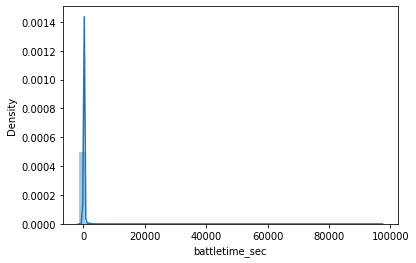

In [39]:
sns.distplot(battle_table['battletime_sec'])

In [40]:
battle_table[['enemies_killed','battletime_sec']].sum()

enemies_killed     169928
battletime_sec    7016703
dtype: int64

Seeing some unexpected results:
    - Negative kills
    - Negative battle time
    - Excessive battle time
    
Seems fairly often these are during the tutorial but not always, however, these are pretty rare issues so can potentially just exclude those players from analysis / replace the values.

In [41]:
# a little overview of some of the data issues

print("Battles recorded: " + str(len(battle_table)))
print("Battles with over 1 hr of time (typical is 2-3 minutes): " + str(len(battle_table[battle_table['battletime_sec']>3600])))
print("Battles with over 30 mins of time (typical is 2-3 minutes): " + str(len(battle_table[battle_table['battletime_sec']>1800])))
print("Battles with over 10 mins of time (typical is 2-3 minutes): " + str(len(battle_table[battle_table['battletime_sec']>600])))
print("Battles with a negative time: " + str(len(battle_table[battle_table['battletime_sec']<0])))

Battles recorded: 30502
Battles with over 1 hr of time (typical is 2-3 minutes): 48
Battles with over 30 mins of time (typical is 2-3 minutes): 120
Battles with over 10 mins of time (typical is 2-3 minutes): 793
Battles with a negative time: 10


In [42]:
# clean up excess rows
battle_table = battle_table.drop(['previous_attempt','previous_player'],axis=1)

In [43]:
battle_table.dtypes

id                                    object
event_datetime                datetime64[ns]
attempt                                int64
type                                  object
difficulty                            object
player_id                             object
event_id                               int64
attempt_enemies_killed                 int64
attempt_nodes_visited                  int64
player_ship_class                     object
attempt_playtime_sec                   int64
attempt_stardust_collected             int64
attempt_tokens_collected               int64
status                                object
killed_by                             object
realm                                 object
enemies_killed                         int64
battletime_sec                         int64
dtype: object

In [44]:
battle_table['realm_num'] = battle_table['realm'].map({'R_HussiteTest' : -1, 'R_FortressTest' : -1, 'R_Tutorial' : 0, 'R_Kingdom' : 1, 'R_Marauder' : 2, 'R_Hinterlands' : 3})
battle_table['realm_num'] = battle_table['realm_num'].astype('int64')

In [45]:
battle_table

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,battletime_sec,realm_num
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9,7,0,NaN,131,0,0,Complete,NaN,R_Tutorial,7,131,0
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16,10,3,NaN,532,0,0,Complete,NaN,R_Tutorial,3,401,0
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57,3,3,NaN,444,0,0,Complete,NaN,R_Kingdom,3,444,1
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70,10,6,NaN,954,42,2,Complete,NaN,R_Kingdom,7,510,1
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78,18,8,NaN,1412,59,3,Fail,Royal_Lancer,R_Kingdom,8,458,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30497,2020-10-05 08:43:402227.csv99.0,2020-10-05 08:43:40,3,Royal_randombattle,Low,2227.csv,99,6,3,NaN,225,14,1,Complete,NaN,R_Kingdom,3,192,1
30498,2020-10-05 08:47:192227.csv112.0,2020-10-05 08:47:19,3,BOSS_hussite,Low,2227.csv,112,9,6,NaN,512,28,2,Fail,Royal_Warrior,R_Kingdom,3,287,1
30499,2020-10-05 05:38:022228.csv7.0,2020-10-05 05:38:02,1,tutorial,Low,2228.csv,7,11,0,NaN,17,0,0,Complete,NaN,R_Tutorial,11,17,0
30500,2020-10-05 05:40:462228.csv14.0,2020-10-05 05:40:46,1,tutorial2,Low,2228.csv,14,16,3,NaN,299,0,0,Complete,NaN,R_Tutorial,5,282,0


In [46]:
battle_table.to_csv('battle_table.csv', index=False)

### How to fix the negatives?

### Which map / zone?

back to the logs...lets find someone who was successful against multiple bosses and they are most likely to have visited multiple zones

In [47]:
battle_table['type'].value_counts()

Royal_randombattle       11886
Marauder_randombattle     4501
BOSS_hussite              3723
highwaymen                1989
tutorial                  1983
village                   1979
tutorial2                 1828
smuggler_fight            1359
BOSS_chariot               660
automated_defences         591
BOSS_fortress                3
Name: type, dtype: int64

In [48]:
battle_table[battle_table['type']=='BOSS_fortress']

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,battletime_sec,realm_num
7764,2021-04-15 02:15:260471.csv72.0,2021-04-15 02:15:26,4,BOSS_fortress,Low,0471.csv,72,0,0,NaN,0,0,0,Fail,Marauder_Slasher,R_FortressTest,0,0,-1
7765,2021-04-16 08:55:100471.csv118.0,2021-04-16 08:55:10,4,BOSS_fortress,Low,0471.csv,118,0,0,NaN,0,0,0,Fail,Marauder_Slasher,R_FortressTest,0,0,-1
19031,2020-10-12 10:25:431233.csv519.0,2020-10-12 10:25:43,8,BOSS_fortress,Medium,1233.csv,519,84,29,NaN,1948,332,35,Fail,Marauder_Slayer,R_Hinterlands,3,308,3


In [49]:
third_boss_player = pd.read_csv('data/1233.csv', parse_dates=[0], names=sampledata.columns)

In [50]:
third_boss_player['realm'].value_counts()

R_Kingdom        1440
R_Marauder        969
R_Hinterlands     104
R_Tutorial         36
Name: realm, dtype: int64

## Player Attempt Table

Potential target table - **player attempts**
- player
- attempt
- attempt_start_datetime
- attempt_end_datetime
- map_reached
- fuel_gained
- fuel_used
- fuel_balance
- tokens_collected
- stardust_gained
- shipclass
- avg_battlet_time
- attempt_duration
- enemieskilled
- nodesvisited
- battles_won_total
- battles_won_low
- battles_won_med
- battles_won_high
- killed_by
- killed_by_battle_level

In [51]:
battle_table.head(60)

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,battletime_sec,realm_num
0,2021-11-14 04:33:250001.csv9.0,2021-11-14 04:33:25,1,tutorial,Low,0001.csv,9,7,0,NaN,131,0,0,Complete,NaN,R_Tutorial,7,131,0
1,2021-11-14 04:38:160001.csv16.0,2021-11-14 04:38:16,1,tutorial2,Low,0001.csv,16,10,3,NaN,532,0,0,Complete,NaN,R_Tutorial,3,401,0
2,2021-11-14 05:59:110001.csv57.0,2021-11-14 05:59:11,2,Royal_randombattle,Low,0001.csv,57,3,3,NaN,444,0,0,Complete,NaN,R_Kingdom,3,444,1
3,2021-11-14 06:07:530001.csv70.0,2021-11-14 06:07:53,2,automated_defences,Low,0001.csv,70,10,6,NaN,954,42,2,Complete,NaN,R_Kingdom,7,510,1
4,2021-11-14 06:13:470001.csv78.0,2021-11-14 06:13:47,2,Royal_randombattle,Medium,0001.csv,78,18,8,NaN,1412,59,3,Fail,Royal_Lancer,R_Kingdom,8,458,1
5,2021-11-14 06:16:300001.csv87.0,2021-11-14 06:16:30,3,Royal_randombattle,Low,0001.csv,87,3,1,NaN,51,0,0,Complete,NaN,R_Kingdom,3,51,1
6,2021-11-14 06:23:360001.csv105.0,2021-11-14 06:23:36,3,highwaymen,Low,0001.csv,105,6,4,NaN,466,7,1,Complete,NaN,R_Kingdom,3,415,1
7,2021-11-14 06:32:140001.csv121.0,2021-11-14 06:32:14,3,Royal_randombattle,Medium,0001.csv,121,15,8,NaN,1051,13,3,Fail,Royal_Archer,R_Kingdom,9,585,1
8,2021-11-14 06:33:570001.csv126.0,2021-11-14 06:33:57,4,Royal_randombattle,Low,0001.csv,126,3,0,NaN,18,0,0,Complete,NaN,R_Kingdom,3,18,1
9,2021-11-14 06:36:180001.csv134.0,2021-11-14 06:36:18,4,highwaymen,Low,0001.csv,134,6,2,NaN,169,32,2,Complete,NaN,R_Kingdom,3,151,1


In [52]:
battle_table_tmp = battle_table
battle_table_tmp['event_datetime2'] = battle_table_tmp['event_datetime']
battle_table_tmp['killed_by'] = battle_table_tmp['killed_by'].fillna('!')
attempts = battle_table_tmp.groupby(by=['player_id','attempt']).agg({'event_datetime' : 'min', 'event_datetime2' : 'max', 'attempt_enemies_killed' : 'max', 'attempt_playtime_sec' : 'max', 'attempt_stardust_collected' : 'max', 'attempt_tokens_collected' : 'max', 'killed_by' : 'max', 'enemies_killed' : 'mean', 'battletime_sec' : 'mean', 'realm_num' : 'max', 'event_id' : 'size' })
attempts = attempts.reset_index()
attempts.columns = ['player_id','attempt','attempt_start_datetime', 'attempt_latest_datetime', 'attempt_enemies_killed','attempt_playtime_sec','attempt_stardust_collected','attempt_tokens_collected','killed_by','avg_enemies_killed','avg_battletime_sec','realm_reached','battle_count']
attempts

,player_id,attempt,attempt_start_datetime,attempt_latest_datetime,attempt_enemies_killed,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,killed_by,avg_enemies_killed,avg_battletime_sec,realm_reached,battle_count
0,0001.csv,1,2021-11-14 04:33:25,2021-11-14 04:38:16,10,532,0,0,!,5.000000,266.000000,0,2
1,0001.csv,2,2021-11-14 05:59:11,2021-11-14 06:13:47,18,1412,59,3,Royal_Lancer,6.000000,470.666667,1,3
2,0001.csv,3,2021-11-14 06:16:30,2021-11-14 06:32:14,15,1051,13,3,Royal_Archer,5.000000,350.333333,1,3
3,0001.csv,4,2021-11-14 06:33:57,2021-11-14 06:55:04,20,1336,142,6,!,4.000000,267.200000,1,5
4,0001.csv,5,2021-11-14 08:15:26,2021-11-14 08:22:21,7,595,40,2,Royal_Archer,3.500000,297.500000,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7537,2227.csv,1,2020-10-05 08:17:07,2020-10-05 08:19:28,10,244,0,0,!,5.000000,122.000000,0,2
7538,2227.csv,2,2020-10-05 08:24:19,2020-10-05 08:38:16,28,949,82,5,Hussite,4.666667,158.166667,1,6
7539,2227.csv,3,2020-10-05 08:40:12,2020-10-05 08:47:19,9,512,28,2,Royal_Warrior,3.000000,170.666667,1,3
7540,2228.csv,1,2020-10-05 05:38:02,2020-10-05 05:40:46,16,299,0,0,!,8.000000,149.500000,0,2


In [53]:
attempts.player_id.nunique()

1978

In [54]:
attempts.to_csv('attempts.csv', index=False)

## Player Table

In [491]:
players = attempts.groupby(by=['player_id']).agg({'attempt':'max', 'attempt_start_datetime' : 'min', 'attempt_latest_datetime' : 'max', 'attempt_enemies_killed' : 'sum', 'attempt_tokens_collected' : 'sum', 'realm_reached' : 'max', 'battle_count' : 'sum'})
players = players.reset_index()
players # does not include players who have not participated in a battle

,player_id,attempt,attempt_start_datetime,attempt_latest_datetime,attempt_enemies_killed,attempt_tokens_collected,realm_reached,battle_count
0,0001.csv,10,2021-11-14 04:33:25,2021-11-14 10:03:35,189,65,2,42
1,0002.csv,55,2021-06-27 10:34:34,2021-11-14 04:17:41,497,177,2,146
2,0003.csv,1,2021-11-14 01:04:42,2021-11-14 01:09:07,20,0,0,2
3,0004.csv,9,2021-08-14 11:29:01,2021-11-13 10:04:58,333,160,2,56
4,0005.csv,3,2021-11-13 06:30:19,2021-11-13 06:54:10,24,6,1,9
...,...,...,...,...,...,...,...,...
1973,2224.csv,2,2020-10-07 07:26:20,2020-10-07 07:29:29,5,1,1,2
1974,2225.csv,4,2020-10-06 06:32:21,2020-10-06 10:23:46,38,6,1,9
1975,2226.csv,1,2020-10-05 10:12:59,2020-10-05 10:15:07,20,0,0,2
1976,2227.csv,3,2020-10-05 08:17:07,2020-10-05 08:47:19,47,7,1,11


In [492]:
players.columns = ['player_id','total_attempts','first_login','last_login','total_enemies_killed','total_tokens_collected','realm_reached','battle_count']

In [493]:
players

,player_id,total_attempts,first_login,last_login,total_enemies_killed,total_tokens_collected,realm_reached,battle_count
0,0001.csv,10,2021-11-14 04:33:25,2021-11-14 10:03:35,189,65,2,42
1,0002.csv,55,2021-06-27 10:34:34,2021-11-14 04:17:41,497,177,2,146
2,0003.csv,1,2021-11-14 01:04:42,2021-11-14 01:09:07,20,0,0,2
3,0004.csv,9,2021-08-14 11:29:01,2021-11-13 10:04:58,333,160,2,56
4,0005.csv,3,2021-11-13 06:30:19,2021-11-13 06:54:10,24,6,1,9
...,...,...,...,...,...,...,...,...
1973,2224.csv,2,2020-10-07 07:26:20,2020-10-07 07:29:29,5,1,1,2
1974,2225.csv,4,2020-10-06 06:32:21,2020-10-06 10:23:46,38,6,1,9
1975,2226.csv,1,2020-10-05 10:12:59,2020-10-05 10:15:07,20,0,0,2
1976,2227.csv,3,2020-10-05 08:17:07,2020-10-05 08:47:19,47,7,1,11


In [494]:
# our players table only includes players that participated in a battle....]
all_players = weekly_login_activity['player_id'].value_counts()
all_players = pd.DataFrame(all_players)
all_players = all_players.reset_index()
all_players.columns=['player_id','dropme']
all_players = all_players.drop(['dropme'],axis=1)

In [495]:
players = pd.merge(all_players, players, how='left', on='player_id')

In [496]:
players

,player_id,total_attempts,first_login,last_login,total_enemies_killed,total_tokens_collected,realm_reached,battle_count
0,0306.csv,50.0,2021-04-20 09:51:40,2021-06-23 02:35:50,423.0,164.0,1.0,138.0
1,0176.csv,42.0,2021-01-23 06:28:41,2021-08-16 11:38:45,1048.0,543.0,2.0,216.0
2,0560.csv,15.0,2020-10-12 11:26:40,2021-03-15 06:43:25,322.0,191.0,2.0,75.0
3,0437.csv,16.0,2021-03-18 11:09:00,2021-04-24 10:55:41,601.0,203.0,2.0,87.0
4,0674.csv,14.0,2020-11-23 07:58:35,2021-02-18 06:04:21,83.0,34.0,1.0,32.0
...,...,...,...,...,...,...,...,...
2224,0822.csv,3.0,2021-01-28 03:11:27,2021-01-28 03:29:51,41.0,4.0,1.0,8.0
2225,0821.csv,2.0,2021-01-28 04:47:01,2021-01-28 04:56:13,24.0,2.0,1.0,4.0
2226,0820.csv,1.0,2021-01-28 07:02:11,2021-01-28 07:02:11,8.0,0.0,0.0,1.0
2227,0819.csv,3.0,2021-01-28 11:22:40,2021-01-28 11:46:52,32.0,8.0,1.0,7.0


In [497]:
battle_table[battle_table['type']=='BOSS_hussite']

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,battletime_sec,realm_num,event_datetime2
21,2021-11-14 08:57:340001.csv300.0,2021-11-14 08:57:34,7,BOSS_hussite,Medium,0001.csv,300,22,11,NaN,1886,125,8,Fail,Hussite,R_Kingdom,0,883,1,2021-11-14 08:57:34
27,2021-11-14 09:18:460001.csv357.0,2021-11-14 09:18:46,8,BOSS_hussite,High,0001.csv,357,27,12,NaN,1100,134,7,Complete,!,R_Kingdom,5,402,1,2021-11-14 09:18:46
35,2021-11-14 09:50:220001.csv447.0,2021-11-14 09:50:22,9,BOSS_hussite,High,0001.csv,447,23,12,NaN,841,91,6,Fail,Royal_Warrior,R_Kingdom,3,162,1,2021-11-14 09:50:22
39,2021-11-14 09:58:160001.csv476.0,2021-11-14 09:58:16,10,BOSS_hussite,Medium,0001.csv,476,13,7,NaN,355,71,3,Complete,!,R_Kingdom,4,61,1,2021-11-14 09:58:16
51,2021-06-27 11:22:040002.csv157.0,2021-06-27 11:22:04,4,BOSS_hussite,Medium,0002.csv,157,6,7,NaN,678,15,5,Fail,Royal_Warrior,R_Kingdom,0,322,1,2021-06-27 11:22:04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30444,2020-10-07 09:30:552215.csv78.0,2020-10-07 09:30:55,3,BOSS_hussite,Low,2215.csv,78,16,6,NaN,356,37,3,Complete,!,R_Kingdom,7,134,1,2020-10-07 09:30:55
30453,2020-10-07 07:38:202218.csv107.0,2020-10-07 07:38:20,2,BOSS_hussite,High,2218.csv,107,31,13,NaN,1535,67,5,Fail,Hussite,R_Kingdom,4,469,1,2020-10-07 07:38:20
30459,2020-10-07 08:00:552218.csv178.0,2020-10-07 08:00:55,3,BOSS_hussite,High,2218.csv,178,36,14,NaN,1219,143,6,Complete,!,R_Kingdom,4,373,1,2020-10-07 08:00:55
30495,2020-10-05 08:38:162227.csv81.0,2020-10-05 08:38:16,2,BOSS_hussite,Medium,2227.csv,81,28,9,NaN,949,82,5,Fail,Hussite,R_Kingdom,1,317,1,2020-10-05 08:38:16


In [498]:
# hussite_first_reached_in_attempt
# hussite_reached
# hussite_battles_won
# ????hussite_first_defeated_in_attempt
# chariot_first_reached_in_attempt
# chariot_reached
# chariot_battles_won

hussite_first_reached_in_attempt = battle_table[battle_table['type']=='BOSS_hussite'].groupby(by='player_id').agg({'attempt':'min'})
hussite_first_defeated_in_attempt = battle_table[(battle_table['type']=='BOSS_hussite') & (battle_table['status']=='Complete')].groupby(by='player_id').agg({'attempt':'min'})
hussite_reached = battle_table[(battle_table['type']=='BOSS_hussite')].groupby(by='player_id').agg({'attempt':'size'})
hussite_battles_won = battle_table[(battle_table['type']=='BOSS_hussite') & (battle_table['status']=='Complete')].groupby(by='player_id').agg({'attempt':'size'})
chariot_first_reached_in_attempt = battle_table[battle_table['type']=='BOSS_chariot'].groupby(by='player_id').agg({'attempt':'min'})
chariot_first_defeated_in_attempt = battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')].groupby(by='player_id').agg({'attempt':'min'})
chariot_reached = battle_table[(battle_table['type']=='BOSS_chariot')].groupby(by='player_id').agg({'attempt':'size'})
chariot_battles_won = battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')].groupby(by='player_id').agg({'attempt':'size'})

In [499]:
players = pd.merge(players, hussite_first_reached_in_attempt, how='left', on='player_id')
players = pd.merge(players, hussite_first_defeated_in_attempt, how='left', on='player_id')
players = pd.merge(players, hussite_reached, how='left', on='player_id')
players = pd.merge(players, hussite_battles_won, how='left', on='player_id')
players = pd.merge(players, chariot_first_reached_in_attempt, how='left', on='player_id')
players = pd.merge(players, chariot_first_defeated_in_attempt, how='left', on='player_id')
players = pd.merge(players, chariot_reached, how='left', on='player_id')
players = pd.merge(players, chariot_battles_won, how='left', on='player_id')

C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/1856530369.py:4: FutureWarning: Passing 'suffixes' which cause duplicate columns {'attempt_x'} in the result is deprecated and will raise a MergeError in a future version.
  players = pd.merge(players, hussite_battles_won, how='left', on='player_id')
C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/1856530369.py:6: FutureWarning: Passing 'suffixes' which cause duplicate columns {'attempt_x'} in the result is deprecated and will raise a MergeError in a future version.
  players = pd.merge(players, chariot_first_defeated_in_attempt, how='left', on='player_id')
C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/1856530369.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'attempt_x'} in the result is deprecated and will raise a MergeError in a future version.
  players = pd.merge(players, chariot_battles_won, how='left', on='player_id')


In [500]:
players.columns = ['player_id','total_attempts','first_login','last_login','total_enemies_killed','total_tokens_collected','realm_reached','battle_count','hussite_first_reached_in_attempt','hussite_first_defeated_in_attempt','hussite_reached','hussite_battles_won','chariot_first_reached_in_attempt','chariot_first_defeated_in_attempt','chariot_reached','chariot_battles_won']

In [501]:
players

,player_id,total_attempts,first_login,last_login,total_enemies_killed,total_tokens_collected,realm_reached,battle_count,hussite_first_reached_in_attempt,hussite_first_defeated_in_attempt,hussite_reached,hussite_battles_won,chariot_first_reached_in_attempt,chariot_first_defeated_in_attempt,chariot_reached,chariot_battles_won
0,0306.csv,50.0,2021-04-20 09:51:40,2021-06-23 02:35:50,423.0,164.0,1.0,138.0,13.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN
1,0176.csv,42.0,2021-01-23 06:28:41,2021-08-16 11:38:45,1048.0,543.0,2.0,216.0,2.0,7.0,34.0,29.0,13.0,25.0,16.0,5.0
2,0560.csv,15.0,2020-10-12 11:26:40,2021-03-15 06:43:25,322.0,191.0,2.0,75.0,3.0,3.0,13.0,11.0,7.0,12.0,3.0,1.0
3,0437.csv,16.0,2021-03-18 11:09:00,2021-04-24 10:55:41,601.0,203.0,2.0,87.0,3.0,5.0,11.0,9.0,8.0,13.0,5.0,1.0
4,0674.csv,14.0,2020-11-23 07:58:35,2021-02-18 06:04:21,83.0,34.0,1.0,32.0,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2224,0822.csv,3.0,2021-01-28 03:11:27,2021-01-28 03:29:51,41.0,4.0,1.0,8.0,2.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2225,0821.csv,2.0,2021-01-28 04:47:01,2021-01-28 04:56:13,24.0,2.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2226,0820.csv,1.0,2021-01-28 07:02:11,2021-01-28 07:02:11,8.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2227,0819.csv,3.0,2021-01-28 11:22:40,2021-01-28 11:46:52,32.0,8.0,1.0,7.0,3.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [502]:
# our first login and last login is a bit meh here as it's based on attempts which in turn is based on battles....
# I initially left this table and came back to it and added some interesting stuff but we now have better places to derive 
# this info and also capture total_playtime
# probably should have just restarted building this table tbh but just going to hacksor that info into it for now...

In [503]:
daily_login_activity

,login_date,player_id,duration,sessions,type
0,2021-11-13,0001.csv,10.0,1.0,New
1,2021-11-14,0001.csv,11646.0,2.0,Continuing
2,2021-06-27,0002.csv,5937.0,1.0,New
3,2021-06-28,0002.csv,1443.0,0.0,Continuing
4,2021-11-04,0002.csv,6006.0,1.0,Winback
...,...,...,...,...,...
3260,2020-10-06,2225.csv,2909.0,2.0,New
3261,2020-10-05,2226.csv,3363.0,1.0,New
3262,2020-10-05,2227.csv,2071.0,1.0,New
3263,2020-10-05,2228.csv,923.0,1.0,New


In [504]:
# players
first_login_dates = daily_login_activity.groupby(by=['player_id']).agg({'login_date':'min'})
last_login_dates = daily_login_activity.groupby(by=['player_id']).agg({'login_date':'max'})
durations = daily_login_activity.groupby(by=['player_id']).agg({'duration':'sum'})
sessions = daily_login_activity.groupby(by=['player_id']).agg({'sessions':'sum'})

first_login_dates = first_login_dates.reset_index()
last_login_dates = last_login_dates.reset_index()
durations = durations.reset_index()
sessions = sessions.reset_index()

players = players.drop(['first_login','last_login'],axis=1)
players = pd.merge(players, first_login_dates, how='left', on='player_id')
players = pd.merge(players, last_login_dates, how='left', on='player_id')
players = pd.merge(players, durations, how='left', on='player_id')
players = pd.merge(players, sessions, how='left', on='player_id')

In [505]:
players.columns = ['player_id','total_attempts','total_enemies_killed','total_tokens_collected','realm_reached',
                   'battle_count','hussite_first_reached_in_attempt','hussite_first_defeated_in_attempt','hussite_reached','hussite_battles_won',
                   'chariot_first_reached_in_attempt','chariot_first_defeated_in_attempt','chariot_reached','chariot_battles_won','first_login_date','last_login_date','gametime_secs','sessions']

In [506]:
players = players[['player_id', 'first_login_date', 'last_login_date', 'gametime_secs', 'sessions', 'total_attempts', 'total_enemies_killed',
       'total_tokens_collected', 'realm_reached', 'battle_count', 'hussite_first_reached_in_attempt', 'hussite_first_defeated_in_attempt',
       'hussite_reached', 'hussite_battles_won', 'chariot_first_reached_in_attempt', 'chariot_first_defeated_in_attempt',
       'chariot_reached', 'chariot_battles_won']]

In [507]:
players.to_csv('players.csv',index=False)

## Activity Table

- player
- date
- total_time_played
- sessions

In [58]:
player_logs['event_datetime_check'] = pd.to_datetime(player_logs['event_datetime'], errors='coerce')

In [59]:
player_logs[player_logs['event_datetime_check'].isna()]

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,event_datetime_check
648264,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:29:51,1641.csv,20.0,NaT
648285,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:32:42,1641.csv,41.0,NaT
648295,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:34:33,1641.csv,51.0,NaT
648347,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:41:53,1641.csv,76.0,NaT
648351,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:43:35,1641.csv,80.0,NaT
648355,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:44:08,1641.csv,84.0,NaT
648368,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:47:31,1641.csv,89.0,NaT
648430,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:57:49,1641.csv,120.0,NaT
648435,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:58:19,1641.csv,124.0,NaT
648439,tele2-subid: 10.142.87.242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1641.csv,2020-10-10 08:58:47,1641.csv,128.0,NaT


In [60]:
player_logs = player_logs[player_logs['event_datetime_check'].notna()]

In [61]:
player_logs

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,event_datetime_check
0,2021-11-13 08:11:30,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,0001.csv,NaN,NaN,1.0,2021-11-13 08:11:30
1,2021-11-13 08:11:40,NaN,MainMenu,gameclose,NaN,NaN,NaN,NaN,0001.csv,2021-11-13 08:11:30,0001.csv,2.0,2021-11-13 08:11:40
2,2021-11-14 04:27:30,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,0001.csv,2021-11-13 08:11:40,0001.csv,3.0,2021-11-14 04:27:30
3,2021-11-14 04:27:57,R_Tutorial,NaN,event,Start,TUT_START,NaN,NaN,0001.csv,2021-11-14 04:27:30,0001.csv,4.0,2021-11-14 04:27:57
4,2021-11-14 04:28:10,R_Tutorial,NaN,event,Start,TUT_START.TUT_START_1,NaN,NaN,0001.csv,2021-11-14 04:27:57,0001.csv,5.0,2021-11-14 04:28:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
755064,2020-10-05 05:45:22,R_Kingdom,MainMenu,gameclose,NaN,NaN,NaN,NaN,2228.csv,2020-10-05 05:45:14,2228.csv,49.0,2020-10-05 05:45:22
755065,2020-10-05 07:24:03,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,2229.csv,2020-10-05 05:45:22,2228.csv,1.0,2020-10-05 07:24:03
755066,2020-10-05 07:24:53,NaN,MainMenu,gameclose,NaN,NaN,NaN,NaN,2229.csv,2020-10-05 07:24:03,2229.csv,2.0,2020-10-05 07:24:53
755067,2020-10-05 12:16:50,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,2229.csv,2020-10-05 07:24:53,2229.csv,3.0,2020-10-05 12:16:50


In [62]:
player_logs['event_datetime'] = pd.to_datetime(player_logs['event_datetime'])

C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/702950415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_logs['event_datetime'] = pd.to_datetime(player_logs['event_datetime'])


In [63]:
player_logs.dtypes

event_datetime          datetime64[ns]
realm                           object
battle                          object
event_type                      object
event_sub_type                  object
event_value                     object
event_value2                    object
event_value3                    object
player_id                       object
prior_time                      object
prior_player                    object
event_id                       float64
event_datetime_check    datetime64[ns]
dtype: object

In [64]:
logins = player_logs[(player_logs['event_type'] == 'gamestart') | (player_logs['event_type'] =='gameclose')].copy()

In [65]:
logins = logins[['event_datetime','event_type','player_id']]

In [66]:
logins['prior_event_datetime'] = logins['event_datetime'].shift(1)

In [67]:
logins['event_type'].value_counts()

gamestart    4353
gameclose    4131
Name: event_type, dtype: int64

..yeah, that was wishful thinking

In [68]:
# alternative approach then:

# add a duration to each row in player_logs
# group by player, day and sum the duration
# count gamestarts for no_of_sessions

# issue to handle: the borked all timestamps show as am, ....if the duration calculation is negative, add 12 hours.
# issue to handle: if it is a gamestart event....set duration to 0

In [69]:
player_logs['prior_event_datetime'] = player_logs['event_datetime'].shift(1)
player_logs['prior_player_id'] = player_logs['player_id'].shift(1)
player_logs['prior_event_type'] = player_logs['event_type'].shift(1)

C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/3728543829.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_logs['prior_event_datetime'] = player_logs['event_datetime'].shift(1)
C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/3728543829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_logs['prior_player_id'] = player_logs['player_id'].shift(1)
C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/3728543829.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [70]:
from datetime import datetime, timedelta

def calc_duration(row):
    d = 0
    if (row['prior_event_datetime'] == None) | (row['event_type'] == 'gamestart') | (row['prior_player_id'] != row['player_id']) | (row['prior_event_type'] == 'gameclose'):
        d = 0 # set duration to 0 when we start the log, switch player or start a new session.
    else:
        if (row['event_datetime'] - row['prior_event_datetime']).total_seconds() < 0:
            d = ((row['event_datetime'] + timedelta(hours=12)) - row['prior_event_datetime']).total_seconds()
        elif (row['event_datetime'] - row['prior_event_datetime']).total_seconds() > 86400:
            d = ((row['event_datetime']) - (row['prior_event_datetime'] + timedelta(hours=24))).total_seconds() # this applies the assumption nobody plays for 12 hours straight
        elif (row['event_datetime'] - row['prior_event_datetime']).total_seconds() > 43200:
            d = ((row['event_datetime']) - (row['prior_event_datetime'] + timedelta(hours=12))).total_seconds() # this applies the assumption nobody plays for 12 hours straight
        else:
            d = (row['event_datetime'] - row['prior_event_datetime']).total_seconds()
    
    # still getting some anomolies  - some legit some less so, but i think it is fair that if there was a full hour or more between prior event then we can exclude it as it was most likely afk time when legit or something funky happening in the logs.
    if d > 3600:
        d = 0
        
    return d
    
player_logs['duration'] = player_logs.apply(calc_duration,axis=1)

C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/3810190883.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_logs['duration'] = player_logs.apply(calc_duration,axis=1)


In [71]:
player_logs[player_logs['duration'] > 3600]

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,event_datetime_check,prior_event_datetime,prior_player_id,prior_event_type,duration


In [72]:
player_logs.iloc[56909:56913] 

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,event_datetime_check,prior_event_datetime,prior_player_id,prior_event_type,duration
56909,2021-09-08 07:41:30,R_Kingdom,NaN,event,Start,Village_Inn_Parent.Village_Inn.Village_Inn_1,NaN,NaN,0119.csv,2021-09-08 07:41:15,0119.csv,243.0,2021-09-08 07:41:30,2021-09-08 07:41:15,0119.csv,event,15.0
56910,2021-09-08 07:41:33,R_Kingdom,NaN,event,Start,Village_Inn_Parent.Village_Inn.Village_Inn_3,NaN,NaN,0119.csv,2021-09-08 07:41:30,0119.csv,244.0,2021-09-08 07:41:33,2021-09-08 07:41:30,0119.csv,event,3.0
56911,2021-09-08 04:14:23,R_Kingdom,NaN,event,Start,Village_Inn_Parent.Village_Inn.Village_Inn_Gamble,NaN,NaN,0119.csv,2021-09-08 07:41:33,0119.csv,245.0,2021-09-08 04:14:23,2021-09-08 07:41:33,0119.csv,event,0.0
56912,2021-09-08 04:14:30,R_Kingdom,NaN,event,Start,Village_Inn_Parent.Village_Inn.Village_Inn_Gam...,NaN,NaN,0119.csv,2021-09-08 04:14:23,0119.csv,246.0,2021-09-08 04:14:30,2021-09-08 04:14:23,0119.csv,event,7.0


In [73]:
player_logs.iloc[287583:287588] 

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,event_datetime_check,prior_event_datetime,prior_player_id,prior_event_type,duration
287583,2021-02-10 08:27:45,R_Kingdom,NaN,shop,Start,Alchemist,NaN,NaN,0705.csv,2021-02-10 08:27:43,0705.csv,379.0,2021-02-10 08:27:45,2021-02-10 08:27:43,0705.csv,event,2.0
287584,2021-02-10 08:28:09,R_Kingdom,NaN,event,Start,Deserters_Scouts,NaN,NaN,0705.csv,2021-02-10 08:27:45,0705.csv,380.0,2021-02-10 08:28:09,2021-02-10 08:27:45,0705.csv,shop,24.0
287585,2021-02-10 08:28:11,R_Kingdom,NaN,event,Start,Deserters_Scouts.Deserters_Scouts_pay,NaN,NaN,0705.csv,2021-02-10 08:28:09,0705.csv,381.0,2021-02-10 08:28:11,2021-02-10 08:28:09,0705.csv,event,2.0
287586,2021-02-12 11:01:09,R_Kingdom,NaN,gameclose,NaN,NaN,NaN,NaN,0705.csv,2021-02-10 08:28:11,0705.csv,382.0,2021-02-12 11:01:09,2021-02-10 08:28:11,0705.csv,event,0.0
287587,2021-02-14 12:43:25,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,0705.csv,2021-02-12 11:01:09,0705.csv,383.0,2021-02-14 12:43:25,2021-02-12 11:01:09,0705.csv,gameclose,0.0


In [74]:
player_logs.iloc[307930:307934] 

,event_datetime,realm,battle,event_type,event_sub_type,event_value,event_value2,event_value3,player_id,prior_time,prior_player,event_id,event_datetime_check,prior_event_datetime,prior_player_id,prior_event_type,duration
307930,2021-01-27 01:24:02,NaN,MainMenu,gameclose,NaN,NaN,NaN,NaN,0767.csv,2021-01-27 01:23:46,0767.csv,152.0,2021-01-27 01:24:02,2021-01-27 01:23:46,0767.csv,gamestart,16.0
307931,2021-01-27 01:41:37,NaN,NaN,gamestart,NaN,NaN,NaN,NaN,0767.csv,2021-01-27 01:24:02,0767.csv,153.0,2021-01-27 01:41:37,2021-01-27 01:24:02,0767.csv,gameclose,0.0
307932,2021-02-05 07:19:27,R_Kingdom,highwaymen / Low,battle,Start,NaN,NaN,NaN,0767.csv,2021-01-27 01:41:37,0767.csv,154.0,2021-02-05 07:19:27,2021-01-27 01:41:37,0767.csv,gamestart,0.0
307933,2021-02-05 07:20:22,R_Kingdom,highwaymen / Low,battle,Complete,NaN,NaN,NaN,0767.csv,2021-02-05 07:19:27,0767.csv,155.0,2021-02-05 07:20:22,2021-02-05 07:19:27,0767.csv,battle,55.0


In [75]:
player_logs['event_date'] = player_logs['event_datetime'].apply(datetime.date)

C:\Users\Andy\AppData\Local\Temp/ipykernel_17496/987435948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_logs['event_date'] = player_logs['event_datetime'].apply(datetime.date)


In [76]:
player_logs_grouped = player_logs.groupby(by=['event_date','player_id']).agg({'duration':'sum'})

In [77]:
player_logs_grouped = player_logs_grouped.reset_index()

In [78]:
player_logs_grouped

,event_date,player_id,duration
0,2020-10-05,2226.csv,3363.0
1,2020-10-05,2227.csv,2071.0
2,2020-10-05,2228.csv,923.0
3,2020-10-05,2229.csv,57.0
4,2020-10-06,2223.csv,359.0
...,...,...,...
3260,2021-11-13,0004.csv,6819.0
3261,2021-11-13,0005.csv,1707.0
3262,2021-11-14,0001.csv,11646.0
3263,2021-11-14,0002.csv,3046.0


In [79]:
player_logs_sessions = player_logs[player_logs['event_type']=='gamestart']
player_logs_sessions = player_logs_sessions.groupby(by=['event_date','player_id']).agg({'event_type':'size'})
player_logs_sessions = player_logs_sessions.reset_index()

In [80]:
player_logs_sessions

,event_date,player_id,event_type
0,2020-10-05,2226.csv,1
1,2020-10-05,2227.csv,1
2,2020-10-05,2228.csv,1
3,2020-10-05,2229.csv,2
4,2020-10-06,2223.csv,1
...,...,...,...
3166,2021-11-13,0004.csv,1
3167,2021-11-13,0005.csv,1
3168,2021-11-14,0001.csv,2
3169,2021-11-14,0002.csv,2


In [81]:
daily_login_activity = pd.merge(player_logs_grouped, player_logs_sessions, how='left', on=['event_date','player_id'])
daily_login_activity.columns = ['login_date','player_id','duration','sessions']
daily_login_activity['sessions'] = daily_login_activity['sessions'].fillna(0)

In [82]:
# with daily_login_activity : sort by player then login_date
# then shift the login_date for 'prior_login_date'
# if the prior_login_date is null, then 'New'
# elseif the difference between login date and prior_login_date is more than 7? days then 'Winback'
# elseif the difference between login date and prior_login_date is 7 or less then 'Continuing'.

# if we want monthly, will need to recalulated for that.

In [83]:
daily_login_activity = daily_login_activity.sort_values(by=['player_id','login_date'])
daily_login_activity = daily_login_activity.reset_index(drop=True)
daily_login_activity['prior_login_date'] = daily_login_activity['login_date'].shift(1)
daily_login_activity['prior_player_id'] = daily_login_activity['player_id'].shift(1)
daily_login_activity['login_date'] = pd.to_datetime(daily_login_activity['login_date'])
daily_login_activity['prior_login_date'] = pd.to_datetime(daily_login_activity['prior_login_date'])

def define_login_type(row):
    if (row['prior_login_date'] is None) | (row['prior_player_id'] != row['player_id']):
        return 'New'
    elif (row['login_date'] - row['prior_login_date']).days <= 7:
        return 'Continuing'
    else:
        return 'Winback'
    
daily_login_activity['type'] = daily_login_activity.apply(define_login_type, axis=1)

daily_login_activity = daily_login_activity.drop(['prior_login_date','prior_player_id'], axis=1)
daily_login_activity

,login_date,player_id,duration,sessions,type
0,2021-11-13,0001.csv,10.0,1.0,New
1,2021-11-14,0001.csv,11646.0,2.0,Continuing
2,2021-06-27,0002.csv,5937.0,1.0,New
3,2021-06-28,0002.csv,1443.0,0.0,Continuing
4,2021-11-04,0002.csv,6006.0,1.0,Winback
...,...,...,...,...,...
3260,2020-10-06,2225.csv,2909.0,2.0,New
3261,2020-10-05,2226.csv,3363.0,1.0,New
3262,2020-10-05,2227.csv,2071.0,1.0,New
3263,2020-10-05,2228.csv,923.0,1.0,New


In [84]:
daily_login_activity.isna().sum()

login_date    0
player_id     0
duration      0
sessions      0
type          0
dtype: int64

In [85]:
daily_login_activity.to_csv('daily_login_activity.csv', index=False)

In [86]:
weekly_login_activity = daily_login_activity.copy()
# https://stackoverflow.com/questions/27989120/get-week-start-date-monday-from-a-date-column-in-python-pandas
weekly_login_activity['login_week_start'] = weekly_login_activity['login_date'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_login_activity = weekly_login_activity.groupby(by=['player_id','login_week_start']).agg({'duration':'sum', 'sessions':'sum'})
weekly_login_activity = weekly_login_activity.reset_index()


weekly_login_activity = weekly_login_activity.sort_values(by=['player_id','login_week_start'])
weekly_login_activity = weekly_login_activity.reset_index(drop=True)
weekly_login_activity['prior_login_date'] = weekly_login_activity['login_week_start'].shift(1)
weekly_login_activity['prior_player_id'] = weekly_login_activity['player_id'].shift(1)
weekly_login_activity['login_week_start'] = pd.to_datetime(weekly_login_activity['login_week_start'])
weekly_login_activity['prior_login_date'] = pd.to_datetime(weekly_login_activity['prior_login_date'])

def define_weekly_login_type(row):
    if (row['prior_login_date'] is None) | (row['prior_player_id'] != row['player_id']):
        return 'New'
    elif row['login_week_start'] == (row['prior_login_date'] +  timedelta(weeks=1)):
        return 'Continuing'
    else:
        return 'Winback'
    
weekly_login_activity['type'] = weekly_login_activity.apply(define_weekly_login_type, axis=1)

weekly_login_activity = weekly_login_activity.drop(['prior_login_date','prior_player_id'], axis=1)
weekly_login_activity



,player_id,login_week_start,duration,sessions,type
0,0001.csv,2021-11-08,11656.0,3.0,New
1,0002.csv,2021-06-21,5937.0,1.0,New
2,0002.csv,2021-06-28,1443.0,0.0,Continuing
3,0002.csv,2021-11-01,22377.0,6.0,Winback
4,0002.csv,2021-11-08,3046.0,2.0,Continuing
...,...,...,...,...,...
2640,2225.csv,2020-10-05,2909.0,2.0,New
2641,2226.csv,2020-10-05,3363.0,1.0,New
2642,2227.csv,2020-10-05,2071.0,1.0,New
2643,2228.csv,2020-10-05,923.0,1.0,New


In [87]:
weekly_login_activity['type'].value_counts()

New           2229
Continuing     237
Winback        179
Name: type, dtype: int64

In [88]:
weekly_login_activity.to_csv('weekly_login_activity.csv', index=False)

In [ ]:
players

,player_id,attempt,attempt_start_datetime,attempt_latest_datetime,attempt_enemies_killed,attempt_tokens_collected,realm_reached,battle_count
0,0001.csv,10,2021-11-14 04:33:25,2021-11-14 10:03:35,189,65,2,42
1,0002.csv,55,2021-06-27 10:34:34,2021-11-14 04:17:41,497,177,2,146
2,0003.csv,1,2021-11-14 01:04:42,2021-11-14 01:09:07,20,0,0,2
3,0004.csv,9,2021-08-14 11:29:01,2021-11-13 10:04:58,333,160,2,56
4,0005.csv,3,2021-11-13 06:30:19,2021-11-13 06:54:10,24,6,1,9
...,...,...,...,...,...,...,...,...
1973,2224.csv,2,2020-10-07 07:26:20,2020-10-07 07:29:29,5,1,1,2
1974,2225.csv,4,2020-10-06 06:32:21,2020-10-06 10:23:46,38,6,1,9
1975,2226.csv,1,2020-10-05 10:12:59,2020-10-05 10:15:07,20,0,0,2
1976,2227.csv,3,2020-10-05 08:17:07,2020-10-05 08:47:19,47,7,1,11


## Machine Learning

### Can we accurately predict if a player will kill boss 1 based on the data from the attempt?

### If so, what features are most important to a successful boss kill

In [92]:
player_realm_attempt = battle_table.groupby(by=['attempt','player_id','realm','realm_num']).size()
player_realm_attempt = pd.DataFrame(player_realm_attempt)

In [93]:
player_realm_attempt = player_realm_attempt.drop([0], axis=1)

In [94]:
player_realm_attempt = player_realm_attempt.reset_index()
player_realm_attempt = player_realm_attempt[player_realm_attempt['realm_num']>0]

In [95]:
player_realm_attempt

,attempt,player_id,realm,realm_num
70,1,0079.csv,R_Kingdom,1
188,1,0221.csv,R_Kingdom,1
189,1,0221.csv,R_Marauder,2
556,1,0645.csv,R_Kingdom,1
1071,1,1252.csv,R_Kingdom,1
...,...,...,...,...
9355,51,0002.csv,R_Kingdom,1
9356,52,0002.csv,R_Kingdom,1
9357,53,0002.csv,R_Kingdom,1
9358,54,0002.csv,R_Kingdom,1


In [96]:
player_realm_attempt = pd.merge(player_realm_attempt, battle_table[(battle_table['type'] == 'BOSS_hussite') | (battle_table['type'] == 'BOSS_chariot')][['attempt','player_id','realm','realm_num','type','difficulty','attempt_enemies_killed','attempt_nodes_visited','attempt_playtime_sec','attempt_stardust_collected','status']], how='left', on=['attempt','player_id','realm','realm_num'])
player_realm_attempt

,attempt,player_id,realm,realm_num,type,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status
0,1,0079.csv,R_Kingdom,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0221.csv,R_Kingdom,1,BOSS_hussite,Medium,14.0,8.0,503.0,52.0,Complete
2,1,0221.csv,R_Marauder,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,0645.csv,R_Kingdom,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1252.csv,R_Kingdom,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
7428,51,0002.csv,R_Kingdom,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7429,52,0002.csv,R_Kingdom,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7430,53,0002.csv,R_Kingdom,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7431,54,0002.csv,R_Kingdom,1,BOSS_hussite,Medium,9.0,7.0,598.0,33.0,Fail


In [97]:
player_realm_attempt = player_realm_attempt[player_realm_attempt['attempt_playtime_sec']>0].copy()

In [98]:
player_realm_attempt['difficulty'] = player_realm_attempt['difficulty'].map({'Low':0,'Medium':1,'High':2})

In [99]:
player_realm_attempt['status'] = player_realm_attempt['status'].map({'Fail':0,'Complete':1})

In [100]:
player_hussite_attempt = player_realm_attempt[player_realm_attempt['type']=='BOSS_hussite']
player_chariot_attempt = player_realm_attempt[player_realm_attempt['type']=='BOSS_chariot']

In [101]:
player_hussite_attempt = player_hussite_attempt.drop(['realm','type'], axis=1)
player_chariot_attempt = player_chariot_attempt.drop(['realm','type'], axis=1)

In [102]:
def convert_player_id_to_numeric(s):
    s = s[:4]
    return int(s)

player_hussite_attempt['player_id'] = player_hussite_attempt['player_id'].apply(convert_player_id_to_numeric)
player_chariot_attempt['player_id'] = player_chariot_attempt['player_id'].apply(convert_player_id_to_numeric)

In [103]:
player_hussite_attempt.isna().sum()

attempt                       0
player_id                     0
realm_num                     0
difficulty                    0
attempt_enemies_killed        0
attempt_nodes_visited         0
attempt_playtime_sec          0
attempt_stardust_collected    0
status                        1
dtype: int64

In [104]:
battle_table[(battle_table['attempt'] == 2) & (battle_table['player_id'] == '0430.csv')]

,id,event_datetime,attempt,type,difficulty,player_id,event_id,attempt_enemies_killed,attempt_nodes_visited,player_ship_class,attempt_playtime_sec,attempt_stardust_collected,attempt_tokens_collected,status,killed_by,realm,enemies_killed,battletime_sec,realm_num,event_datetime2
6963,2021-04-26 07:34:500430.csv44.0,2021-04-26 07:34:50,2,Royal_randombattle,Low,0430.csv,44,3,1,NaN,67,9,1,Complete,!,R_Kingdom,3,67,1,2021-04-26 07:34:50
6964,2021-04-26 07:37:270430.csv51.0,2021-04-26 07:37:27,2,Royal_randombattle,Low,0430.csv,51,6,3,NaN,203,20,2,Complete,!,R_Kingdom,3,136,1,2021-04-26 07:37:27
6965,2021-04-26 07:43:240430.csv70.0,2021-04-26 07:43:24,2,BOSS_hussite,Low,0430.csv,70,11,7,NaN,639,61,4,NaN,Royal_Warrior,R_Kingdom,5,436,1,2021-04-26 07:43:24


In [105]:
player_hussite_attempt[player_hussite_attempt['status'].isna()]

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status
368,2,430,1,0,11.0,7.0,639.0,61.0,NaN


In [106]:
player_hussite_attempt['status'] = player_hussite_attempt['status'].fillna(0)

In [107]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

y = player_hussite_attempt[['status']]
X = player_hussite_attempt.drop(['status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [108]:
X_test_original = X_test
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [109]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [110]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.np_utils import to_categorical

model = Sequential([ # as far as we know, all networks are sequential
  Dense(80, activation='relu', input_shape=(8,)), # 784= 28*28 dense networks means all neurons in one layer are connected to all neuronsof the next layer
  Dense(30, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(2, activation='softmax'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=30, # go 5 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)

Epoch 1/30
88/88 [==============================] - 1s 965us/step - loss: 0.6666 - accuracy: 0.6027
Epoch 2/30
88/88 [==============================] - 0s 896us/step - loss: 0.6275 - accuracy: 0.6639
Epoch 3/30
88/88 [==============================] - 0s 971us/step - loss: 0.6066 - accuracy: 0.6804
Epoch 4/30
88/88 [==============================] - 0s 1ms/step - loss: 0.5892 - accuracy: 0.7001
Epoch 5/30
88/88 [==============================] - 0s 965us/step - loss: 0.5817 - accuracy: 0.6969
Epoch 6/30
88/88 [==============================] - 0s 1ms/step - loss: 0.5744 - accuracy: 0.7105
Epoch 7/30
88/88 [==============================] - 0s 977us/step - loss: 0.5683 - accuracy: 0.7098
Epoch 8/30
88/88 [==============================] - 0s 1ms/step - loss: 0.5627 - accuracy: 0.7130
Epoch 9/30
88/88 [==============================] - 0s 931us/step - loss: 0.5544 - accuracy: 0.7291
Epoch 10/30
88/88 [==============================] - 0s 850us/step - loss: 0.5571 - accuracy: 0.7241
Epoch

In [111]:
model.evaluate(
  X_test,
  to_categorical(y_test)
)

30/30 [==============================] - 0s 827us/step - loss: 0.4481 - accuracy: 0.7873


[0.4480881989002228, 0.7873254418373108]

In [112]:
model.predict(X_test)

array([[0.6615751 , 0.33842486],
       [0.9203926 , 0.07960741],
       [0.56963617, 0.43036383],
       ...,
       [0.2917376 , 0.70826244],
       [0.7454596 , 0.25454035],
       [0.07407659, 0.9259234 ]], dtype=float32)

In [113]:
X_test_original = X_test_original.reset_index(drop=True)
test_results = pd.concat([pd.DataFrame(X_test_original), pd.DataFrame(y_test), pd.DataFrame(model.predict(X_test))], axis=1)

In [114]:
X

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected
1,1,221,1,1,14.0,8.0,503.0,52.0
10,2,4,1,0,13.0,5.0,839.0,60.0
12,2,5,1,1,7.0,7.0,567.0,46.0
13,2,6,1,1,11.0,8.0,459.0,35.0
14,2,7,1,0,6.0,6.0,663.0,24.0
...,...,...,...,...,...,...,...,...
7418,48,1410,1,1,27.0,11.0,561.0,91.0
7420,49,2,1,1,18.0,11.0,886.0,80.0
7422,49,1410,1,1,28.0,11.0,598.0,133.0
7426,50,1410,1,2,45.0,13.0,815.0,88.0


In [115]:
test_results

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status,0,1
0,4,584,1,1,23.0,9.0,1356.0,96.0,0.0,0.661575,0.338425
1,2,719,1,1,6.0,7.0,777.0,44.0,0.0,0.920393,0.079607
2,2,121,1,0,10.0,6.0,391.0,33.0,1.0,0.569636,0.430364
3,7,1734,1,0,7.0,4.0,434.0,32.0,0.0,0.813812,0.186188
4,2,2032,1,0,10.0,6.0,419.0,24.0,1.0,0.314646,0.685354
...,...,...,...,...,...,...,...,...,...,...,...
926,14,1582,1,2,36.0,13.0,881.0,114.0,1.0,0.213432,0.786568
927,3,529,1,2,24.0,13.0,1042.0,86.0,0.0,0.562201,0.437799
928,2,63,1,1,20.0,9.0,819.0,26.0,0.0,0.291738,0.708262
929,5,875,1,1,15.0,9.0,821.0,84.0,0.0,0.745460,0.254540


In [116]:
test_results[test_results['status']==0].describe()

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status,0,1
count,435.000000,435.000000,435.0,435.000000,435.000000,435.000000,435.000000,435.000000,435.0,435.000000,435.000000
mean,5.388506,1028.914943,1.0,0.756322,12.763218,7.866667,922.406897,59.197701,0.0,0.701071,0.298929
std,6.075057,605.631076,0.0,0.615038,8.302269,2.553694,2520.652494,32.533180,0.0,0.213756,0.213756
min,2.000000,2.000000,1.0,0.000000,0.000000,3.000000,220.000000,0.000000,0.0,0.114808,0.054792
25%,2.000000,503.000000,1.0,0.000000,7.000000,6.000000,487.500000,34.000000,0.0,0.559837,0.122568
50%,3.000000,1067.000000,1.0,1.000000,10.000000,8.000000,652.000000,53.000000,0.0,0.773172,0.226828
75%,6.000000,1518.000000,1.0,1.000000,18.000000,9.000000,913.000000,80.000000,0.0,0.877432,0.440163
max,54.000000,2214.000000,1.0,2.000000,47.000000,14.000000,41845.000000,207.000000,0.0,0.945208,0.885192


In [117]:
test_results[test_results['status']==1].describe()

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status,0,1
count,496.000000,496.000000,496.0,496.000000,496.000000,496.000000,496.000000,496.000000,496.0,496.000000,496.000000
mean,8.608871,954.286290,1.0,0.804435,18.199597,8.159274,646.536290,65.403226,1.0,0.303659,0.696341
std,7.631953,562.648232,0.0,0.705004,10.679655,2.920640,517.257573,35.596599,0.0,0.252883,0.252883
min,2.000000,2.000000,1.0,0.000000,1.000000,3.000000,48.000000,0.000000,1.0,0.005189,0.097267
25%,4.000000,460.750000,1.0,0.000000,10.000000,6.000000,333.000000,37.000000,1.0,0.093861,0.537630
50%,6.000000,1006.500000,1.0,1.000000,15.000000,8.000000,514.000000,63.000000,1.0,0.218462,0.781538
75%,11.000000,1368.750000,1.0,1.000000,24.000000,11.000000,834.250000,87.250000,1.0,0.462370,0.906139
max,49.000000,2215.000000,1.0,2.000000,69.000000,15.000000,5588.000000,218.000000,1.0,0.902733,0.994811


In [118]:
y = player_chariot_attempt[['status']]
X = player_chariot_attempt.drop(['status'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

X_test_original = X_test
scaler = MinMaxScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

model = Sequential([ # as far as we know, all networks are sequential
  Dense(80, activation='relu', input_shape=(8,)), # 784= 28*28 dense networks means all neurons in one layer are connected to all neuronsof the next layer
  Dense(30, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(10, activation='relu'),      # choosing relu instead of sigmoid, this is somewhat common
  Dense(2, activation='softmax'),   # the softmax actiavation is the last one to compensate for the high volume additions
])

# Compile the model.
model.compile(
  optimizer='adam', #here we could use stochastic gradient descent, but adam is a de facto standard
  loss='categorical_crossentropy', #this is how we create the original blame to play the blame game
  metrics=['accuracy'],
)

# Train the model.
history = model.fit(
  X_train,
  to_categorical(y_train), # just to make sure the outputs are not considered numeric (because, ya know, they are numbers...)
  epochs=30, # go 5 times through the whole dataset
  batch_size=32, # send 32 images at a time before you tweak the network again, to make it faster
)

model.evaluate(
  X_test,
  to_categorical(y_test)
)

X_test_original = X_test_original.reset_index(drop=True)
test_results = pd.concat([pd.DataFrame(X_test_original), pd.DataFrame(y_test), pd.DataFrame(model.predict(X_test))], axis=1)

Epoch 1/30
16/16 [==============================] - 0s 866us/step - loss: 0.6898 - accuracy: 0.6061
Epoch 2/30
16/16 [==============================] - 0s 1000us/step - loss: 0.6592 - accuracy: 0.7677
Epoch 3/30
16/16 [==============================] - 0s 1ms/step - loss: 0.6251 - accuracy: 0.7677
Epoch 4/30
16/16 [==============================] - 0s 1000us/step - loss: 0.5873 - accuracy: 0.7677
Epoch 5/30
16/16 [==============================] - 0s 1000us/step - loss: 0.5650 - accuracy: 0.7677
Epoch 6/30
16/16 [==============================] - 0s 1000us/step - loss: 0.5601 - accuracy: 0.7677
Epoch 7/30
16/16 [==============================] - 0s 933us/step - loss: 0.5563 - accuracy: 0.7677
Epoch 8/30
16/16 [==============================] - 0s 867us/step - loss: 0.5514 - accuracy: 0.7677
Epoch 9/30
16/16 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7677
Epoch 10/30
16/16 [==============================] - 0s 1ms/step - loss: 0.5432 - accuracy: 0.7677
E

In [119]:
test_results[test_results['status']==0].describe()

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status,0,1
count,131.000000,131.000000,131.0,131.000000,131.000000,131.000000,131.000000,131.000000,131.0,131.000000,131.000000
mean,8.587786,947.458015,2.0,0.908397,58.977099,17.259542,1749.374046,163.450382,0.0,0.834973,0.165027
std,6.082598,548.387262,0.0,0.518138,32.337753,4.869983,763.732427,62.764421,0.0,0.100790,0.100790
min,2.000000,14.000000,2.0,0.000000,10.000000,9.000000,523.000000,54.000000,0.0,0.477690,0.037234
25%,4.000000,520.000000,2.0,1.000000,36.000000,14.000000,1256.000000,114.500000,0.0,0.807583,0.103576
50%,7.000000,1011.000000,2.0,1.000000,49.000000,17.000000,1544.000000,152.000000,0.0,0.867456,0.132544
75%,11.000000,1364.000000,2.0,1.000000,71.500000,20.000000,2012.000000,204.000000,0.0,0.896424,0.192417
max,38.000000,1994.000000,2.0,2.000000,162.000000,31.000000,4588.000000,358.000000,0.0,0.962766,0.522310


In [120]:
test_results[test_results['status']==1].describe()

,attempt,player_id,realm_num,difficulty,attempt_enemies_killed,attempt_nodes_visited,attempt_playtime_sec,attempt_stardust_collected,status,0,1
count,34.000000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.0,34.000000,34.000000
mean,15.176471,828.058824,2.0,1.147059,86.382353,20.235294,1840.352941,199.235294,1.0,0.681830,0.318170
std,11.774319,642.051491,0.0,0.557720,47.626078,5.872684,1275.621201,72.425953,0.0,0.162546,0.162546
min,2.000000,14.000000,2.0,0.000000,24.000000,11.000000,428.000000,80.000000,1.0,0.283071,0.101621
25%,8.000000,156.500000,2.0,1.000000,47.500000,14.000000,1033.250000,148.500000,1.0,0.599498,0.171230
50%,10.500000,878.000000,2.0,1.000000,77.000000,21.000000,1668.500000,190.000000,1.0,0.703802,0.296198
75%,23.000000,1345.500000,2.0,1.000000,103.500000,24.000000,2017.250000,262.250000,1.0,0.828770,0.400502
max,50.000000,2087.000000,2.0,2.000000,195.000000,31.000000,7179.000000,373.000000,1.0,0.898379,0.716929


## Exploring / Metrics

In [121]:
print("Boss 1: Hussite, kill rate: " + str(round(100 * len(battle_table[(battle_table['type']=='BOSS_hussite') & (battle_table['status']=='Complete')]) / len(battle_table[(battle_table['type']=='BOSS_hussite')]))) + "%")
print("Boss 2: Chariot, kill rate: " + str(round(100 * len(battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')]) / len(battle_table[(battle_table['type']=='BOSS_chariot')]))) + "%")

Boss 1: Hussite, kill rate: 53%
Boss 2: Chariot, kill rate: 23%


c:\users\andy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='attempt', ylabel='Density'>

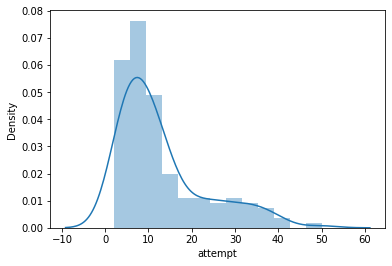

In [122]:
sns.distplot(battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')]['attempt'])

c:\users\andy\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='attempt', ylabel='Density'>

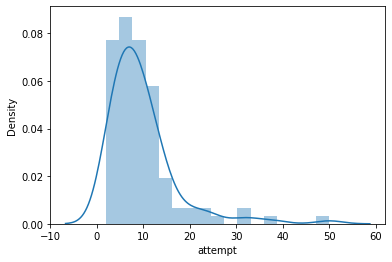

In [123]:
sns.distplot(battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')].groupby(by=['player_id']).agg({'attempt':'min'})['attempt'])

In [124]:
battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')].groupby(by=['player_id']).agg({'attempt':'min'})

,attempt
player_id,
0014.csv,24
0021.csv,11
0039.csv,14
0047.csv,9
0069.csv,12
...,...
1983.csv,9
1994.csv,7
2020.csv,8


In [125]:
battle_table[(battle_table['type']=='BOSS_chariot') & (battle_table['status']=='Complete')]['player_id'].nunique() / battle_table[(battle_table['type']=='BOSS_chariot')]['player_id'].nunique()

0.3971119133574007

In [126]:
def battle_check(battle_type):
    player_percent_successful = round(100*battle_table[(battle_table['type']==battle_type) & (battle_table['status']=='Complete')]['player_id'].nunique() / battle_table[(battle_table['type']==battle_type)]['player_id'].nunique())
    battle_percent_successful = round(100*len(battle_table[(battle_table['type']==battle_type) & (battle_table['status']=='Complete')]) / len(battle_table[battle_table['type']==battle_type]))
    print(battle_type)
    print(str(battle_table[(battle_table['type']==battle_type)]['player_id'].nunique()) + " players have reached " + battle_type)                                        # 277 players have reached 2nd boss
    print(str(battle_table[(battle_table['type']==battle_type) & (battle_table['status']=='Complete')]['player_id'].nunique()) + " (" + str(player_percent_successful) + "%) players have defeated " + battle_type) # 110 (40%) players have defeated 2nd boss,
    print(str(len(battle_table[(battle_table['type']==battle_type) & (battle_table['status']=='Complete')])) + " times total")                                           # 149 times total.
    print(str(len(battle_table[(battle_table['type']==battle_type)])) + " battles (" +  str(battle_percent_successful) + "%)")                                                     # out of 660 battles (23%)

In [127]:
battle_check('BOSS_chariot')

BOSS_chariot
277 players have reached BOSS_chariot
110 (40%) players have defeated BOSS_chariot
149 times total
660 battles (23%)


In [128]:
battle_check('BOSS_hussite')

BOSS_hussite
1195 players have reached BOSS_hussite
663 (55%) players have defeated BOSS_hussite
1980 times total
3723 battles (53%)


# Steam

0438D83903BCD2C4F09A40EC24DDA130

http://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid=440&format=xml

In [129]:
import requests

In [155]:
result = requests.get('https://api.steampowered.com/ISteamApps/GetAppList/v2/')
applist = result.json()
applist = applist['applist']['apps']

In [210]:
applist2 = []

for app in applist:
    if app['name'].find('Devil Slayer') >= 0:
        applist2.append(app)

In [211]:
applist2

[{'appid': 1608190, 'name': 'Devil Slayer - Raksasi: Digital Artbook'},
 {'appid': 1133080, 'name': 'Devil Slayer'},
 {'appid': 1016600, 'name': 'Devil Slayer - Raksasi / 斩妖Raksasi'}]

In [377]:
games_for_comparison = ['FTL: Faster Than Light', 'Hades', 'The Binding of Isaac: Rebirth','Devil Slayer - Raksasi / 斩妖Raksasi']
comparison_list = []

for game in games_for_comparison:
    for app in applist:
        if app['name'] == game:
            comparison_list.append(app)

In [378]:
comparison_list

[{'appid': 212680,
  'name': 'FTL: Faster Than Light',
  'release_date': '22 Apr, 2021'},
 {'appid': 1145360, 'name': 'Hades'},
 {'appid': 250900, 'name': 'The Binding of Isaac: Rebirth'},
 {'appid': 1016600, 'name': 'Devil Slayer - Raksasi / 斩妖Raksasi'}]

In [288]:
# FTL: 212680 - {'name': 'ACH_SECTOR_8', 'percent': 26.600000381469727}, - {'name': 'ACH_SECTOR_8', 'percent': 26.600000381469727}, -  {'name': 'ACH_WIN_EASY', 'percent': 18.200000762939453},
# HADES: 1145360 - name': 'AchClearAnyRun', 'percent': 49.400001525878906},
# Binding Of Isaac 250900 : Rebirth - 12.85%

comparison_list_final = []

for game in comparison_list:
    achievements = requests.get("https://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid=" + str(game['appid']) + "&format=json")
    achievements = achievements.json()
    
    if game['name'] == 'FTL: Faster Than Light':
        for ach in achievements['achievementpercentages']['achievements']:
            if ach['name'] == 'ACH_SECTOR_5':
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Reach sector 5 (half-way)', ach['percent']])
            if ach['name'] == 'ACH_SECTOR_8':   
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Reach sector 8 (last sector)', ach['percent']])
            if ach['name'] == 'ACH_WIN_EASY':   
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Defeat boss on easy difficulty', ach['percent']])
            if ach['name'] == 'ACH_WIN_NORMAL':   
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Defeat boss on normal difficulty', ach['percent']])

                
    if game['name'] == 'Hades':
        for ach in achievements['achievementpercentages']['achievements']:
            if ach['name'] == 'AchClearTartarus': # first boss
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Successfully beating the first floor boss and leaving the room', ach['percent']])
            if ach['name'] == 'AchClearAsphodel': # second boss
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Successfully beating the second floor boss and leaving the room', ach['percent']])
            if ach['name'] == 'AchClearElysium':  # third boss
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Successfully beating the third floor boss and leaving the room', ach['percent']])
            if ach['name'] == 'AchClearAnyRun':  # final boss
                comparison_list_final.append([game['name'], game['appid'], ach['name'], 'Successfully beating the final boss', ach['percent']])
            if ach['name'] == 'AchReachedEnding':  # story ending - 10 successful runs
                comparison_list_final.append([game['name'], game['appid'], ach['name'], '10 successful runs', ach['percent']])
                
    if game['name'] == 'The Binding of Isaac: Rebirth':
        for ach in achievements['achievementpercentages']['achievements']:
            if ach['name'] == '13': # first chapter
                comparison_list_final.append([game['name'], game['appid'], "Monstro's Tooth", 'Complete Chapter 1', ach['percent']])
            if ach['name'] == '14': # second chapter
                comparison_list_final.append([game['name'], game['appid'], "Lil' Chubby", 'Complete Chapter 2', ach['percent']])
            if ach['name'] == '81':  # 4th chapter
                comparison_list_final.append([game['name'], game['appid'], 'Eden' ,'Complete Chapter 4', ach['percent']])
            if ach['name'] == '155':  # 6th chapter
                comparison_list_final.append([game['name'], game['appid'], 'Angels', 'Complete Chapter 6', ach['percent']])
            if ach['name'] == '3':  # final boss
                comparison_list_final.append([game['name'], game['appid'], 'Judas', 'Defeat Satan (final boss?)', ach['percent']])
                
    if game['name'] == 'Devil Slayer - Raksasi / 斩妖Raksasi':
        for ach in achievements['achievementpercentages']['achievements']:
            if ach['name'] == 'ulk_052': # first chapter
                comparison_list_final.append([game['name'], game['appid'], "Crazed Magistrate", 'Defeat the Chapter I Boss', ach['percent']])
            if ach['name'] == 'ulk_012': # second chapter
                comparison_list_final.append([game['name'], game['appid'], "General Nara", 'Defeat the Chapter II Boss', ach['percent']])
            if ach['name'] == 'ulk_001':  # 6th chapter
                comparison_list_final.append([game['name'], game['appid'], 'Xilvaron', 'Chapter III cleared', ach['percent']])
            if ach['name'] == 'ulk_004':  # final boss
                comparison_list_final.append([game['name'], game['appid'], 'First Clear', 'Chapter VI cleared', ach['percent']])
            if ach['name'] == 'ulk_051':  # final boss
                comparison_list_final.append([game['name'], game['appid'], 'Fox Immortal', 'Defeat the Chapter VI Boss', ach['percent']])
                
    
                   
#achievements

In [291]:
comparison_list_final = pd.DataFrame(comparison_list_final, columns = ['Name','Steam ID','Achievement','Description','% of All Players'])

In [292]:
comparison_list_final

,Name,Steam ID,Achievement,Description,% of All Players
0,FTL: Faster Than Light,212680,ACH_SECTOR_5,Reach sector 5 (half-way),30.200001
1,FTL: Faster Than Light,212680,ACH_SECTOR_8,Reach sector 8 (last sector),26.700001
2,FTL: Faster Than Light,212680,ACH_WIN_EASY,Defeat boss on easy difficulty,18.299999
3,FTL: Faster Than Light,212680,ACH_WIN_NORMAL,Defeat boss on normal difficulty,6.800000
4,Hades,1145360,AchClearTartarus,Successfully beating the first floor boss and ...,83.300003
5,Hades,1145360,AchClearAsphodel,Successfully beating the second floor boss and...,75.400002
6,Hades,1145360,AchClearElysium,Successfully beating the third floor boss and ...,62.700001
7,Hades,1145360,AchClearAnyRun,Successfully beating the final boss,49.400002
8,Hades,1145360,AchReachedEnding,10 successful runs,24.700001
9,The Binding of Isaac: Rebirth,250900,Monstro's Tooth,Complete Chapter 1,85.599998


In [297]:
appids = ''
for game in comparison_list:
    appids = appids + ',' + str(game['appid'])
appids = appids[1:]

In [298]:
appids

'212680,1145360,250900,1016600'

In [287]:
achievements = requests.get("https://api.steampowered.com/ISteamUserStats/GetGlobalAchievementPercentagesForApp/v0002/?gameid=1016600&format=json")
achievements = achievements.json()
achievements['achievementpercentages']['achievements']

[{'name': 'ulk_052', 'percent': 92.19999694824219},
 {'name': 'ulk_053', 'percent': 92.0999984741211},
 {'name': 'ulk_054', 'percent': 68},
 {'name': 'ulk_012', 'percent': 63.20000076293945},
 {'name': 'ulk_062', 'percent': 61.599998474121094},
 {'name': 'ulk_001', 'percent': 57.5},
 {'name': 'ulk_046', 'percent': 56.70000076293945},
 {'name': 'ulk_030', 'percent': 48.099998474121094},
 {'name': 'ulk_026', 'percent': 47.79999923706055},
 {'name': 'ulk_002', 'percent': 47.79999923706055},
 {'name': 'ulk_035', 'percent': 45.900001525878906},
 {'name': 'ulk_003', 'percent': 39.099998474121094},
 {'name': 'ulk_063', 'percent': 38.29999923706055},
 {'name': 'ulk_036', 'percent': 38.099998474121094},
 {'name': 'ulk_013', 'percent': 37.900001525878906},
 {'name': 'ulk_004', 'percent': 32.099998474121094},
 {'name': 'ulk_079', 'percent': 31.399999618530273},
 {'name': 'ulk_033', 'percent': 29.200000762939453},
 {'name': 'ulk_050', 'percent': 27.899999618530273},
 {'name': 'ulk_008', 'percent':

In [131]:
games = requests.get("http://api.steampowered.com/ISteamApps/GetAppList/v0002/")
games = games.json()

In [301]:
len(games['applist']['apps']) # 132105

132479

In [325]:
fabular_details = requests.get("http://store.steampowered.com/api/appdetails/?appids=645720")

In [335]:
url = "http://store.steampowered.com/api/appdetails/?appids="+appids+"?key=0438D83903BCD2C4F09A40EC24DDA130&format=json"

In [336]:
url

'http://store.steampowered.com/api/appdetails/?appids=212680,1145360,250900,1016600?key=0438D83903BCD2C4F09A40EC24DDA130&format=json'

In [337]:
game_details = requests.get("http://store.steampowered.com/api/appdetails/?appids="+appids+"?key=0438D83903BCD2C4F09A40EC24DDA130&format=json")

In [329]:
game_details = game_details.json()
game_details

In [338]:
game_details

<Response [400]>

In [358]:
game_details = []
for game in comparison_list:
    game_details.append(requests.get("http://store.steampowered.com/api/appdetails/?appids="+str(game['appid'])))

In [363]:
i=0
for details in game_details:
    game_details[i] = details.json()
    i = i+1

In [379]:
i = 0
for game in comparison_list:
    comparison_list[i]['release_date'] = game_details[i][str(game['appid'])]['data']['release_date']['date']
    i = i+1

In [383]:
comparison_list = pd.DataFrame(comparison_list)
comparison_list[1:2]['release_date'] = '17 Sep, 2020'
comparison_list_final = pd.merge(comparison_list_final, comparison_list, how="left", left_on="Steam ID", right_on="appid")
comparison_list_final = comparison_list_final.drop(['appid','name'], axis=1)

In [398]:
comparison_list_final.to_csv('comparison_list.csv',index=False)

In [323]:
fabular_details = fabular_details.json()

In [324]:
fabular_details['645720']['data']['genres']

[{'id': '1', 'description': 'Action'},
 {'id': '25', 'description': 'Adventure'},
 {'id': '23', 'description': 'Indie'},
 {'id': '3', 'description': 'RPG'}]

In [138]:
game_details['212680']['data']['genres']

[{'id': '23', 'description': 'Indie'},
 {'id': '28', 'description': 'Simulation'},
 {'id': '2', 'description': 'Strategy'}]

In [139]:
game_details['212680']

{'success': True,
 'data': {'type': 'game',
  'name': 'FTL: Faster Than Light',
  'steam_appid': 212680,
  'required_age': 0,
  'is_free': False,
  'dlc': [221001],
  'detailed_description': 'FTL is now available in 9 languages!  English, German, Spanish, French, Italian, Polish, Brazilian Portuguese, Russian and Simplified Mandarin!<br><br>************************<br>The free expansion, FTL: Advanced Edition, is available now!  Content additions include: new alien race, events, weapons, playable ships, drones, and more!  Also adds additional musical tracks by Ben Prunty, and events by Tom Jubert and guest writer Chris Avellone. <br><br>If you already own FTL it should update the new content automatically.  Advanced Edition is included free for anyone who purchases the game from this point forward.<br>************************<br><br>In FTL you experience the atmosphere of running a spaceship trying to save the galaxy. It\'s a dangerous mission, with every encounter presenting a unique 